<a href="https://colab.research.google.com/github/KarNa1312/capstone/blob/main/Capstone_Multi_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn requests wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=7e1a8b00c20b6caae24953c7f8f9284fc67aaf4e2084550ad30cbc0d14c0b227
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [2]:
!apt-get install libpcap-dev
!pip install pyshark

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libdbus-1-dev libpcap0.8 libpcap0.8-dev
The following NEW packages will be installed:
  libdbus-1-dev libpcap-dev libpcap0.8 libpcap0.8-dev
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 607 kB of archives.
After this operation, 2,238 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpcap0.8 amd64 1.10.1-4ubuntu1.22.04.1 [145 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libdbus-1-dev amd64 1.12.20-2ubuntu4.1 [188 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpcap0.8-dev amd64 1.10.1-4ubuntu1.22.04.1 [270 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpcap-dev amd64 1.10.1-4ubuntu1.22.04.1 [3,326 B]
Fetched 607 kB in 0s (1,873 kB/s)
Selecting previously unselected package libpcap0

Mounted at /content/drive
Dataset file found at: /content/drive/MyDrive/Monday-WorkingHours.pcap
Loading PCAP dataset from /content/drive/MyDrive/Monday-WorkingHours.pcap...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Extracting data from PCAP using tshark (limit: 50000 packets)...
No data extracted. Trying alternative method...
Successfully loaded dataset with 50000 packets and 8 features.

--- Dataset Information ---
Shape: (50000, 8)

Columns:
- timestamp
- length
- src_ip
- dst_ip
- protocol
- src_port
- dst_port
- protocol_name

Data Types:
timestamp        datetime64[ns]
length                    int64
src_ip                   object
dst_ip                   object
protocol                 object
src_port                float64
dst_port                float64
protocol_name            object
dtype: object

Missing Values:
timestamp       

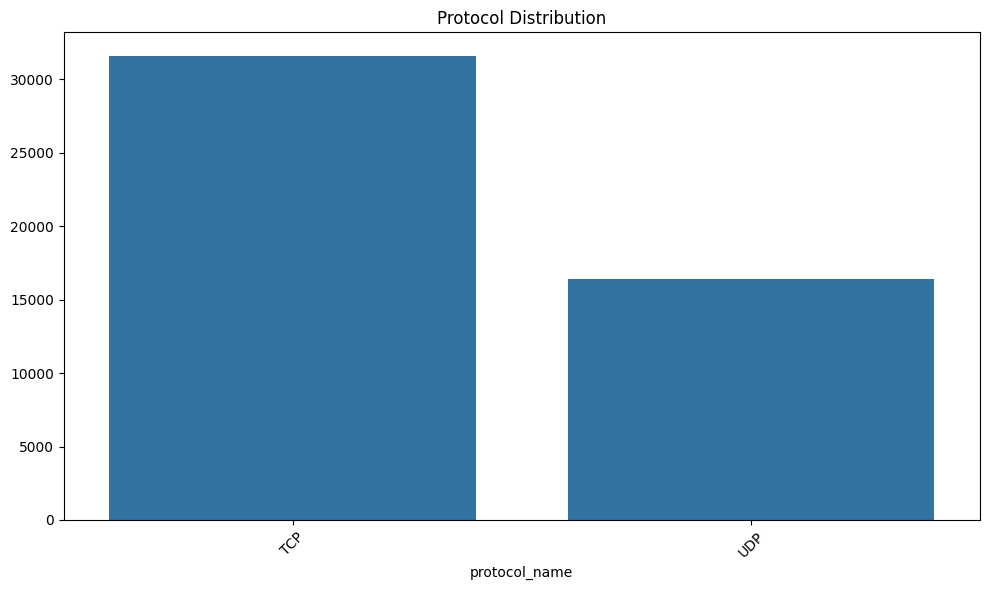


--- Traffic Pattern Analysis ---

Packet Length Statistics:
count    50000.000000
mean       574.633800
std        891.107935
min         60.000000
25%         66.000000
50%        107.000000
75%       1059.750000
max      23414.000000
Name: length, dtype: float64


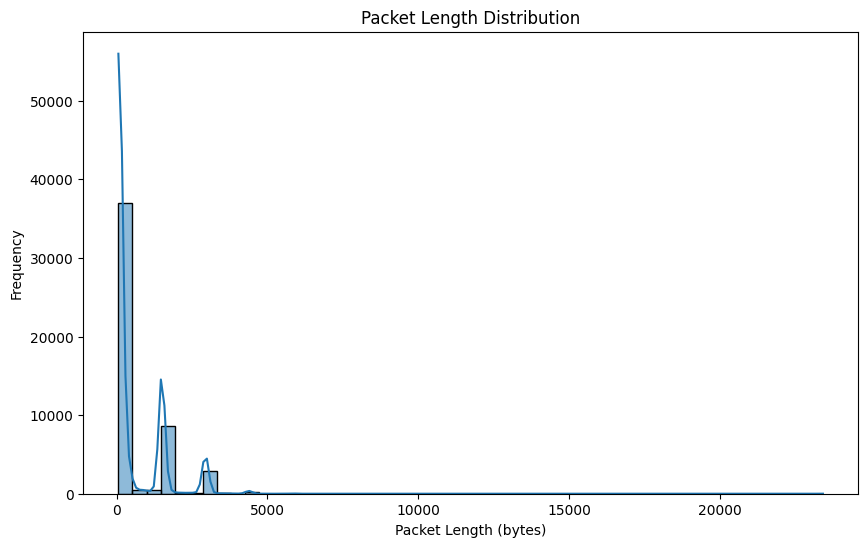


Top Source IPs:
src_ip
192.168.10.3       6247
192.168.10.9       6059
192.168.10.14      5226
192.168.10.12      4860
172.217.11.14      4511
192.168.10.16      2070
192.168.10.50      1834
192.168.10.25      1686
104.27.175.43      1642
206.126.112.141    1403
Name: count, dtype: int64

Top Destination IPs:
dst_ip
192.168.10.9       6619
192.168.10.3       6590
192.168.10.14      6401
192.168.10.12      4454
192.168.10.255     3039
172.217.11.14      2839
224.0.0.251        2106
192.168.10.16      1376
206.126.112.141    1196
192.168.10.50       969
Name: count, dtype: int64


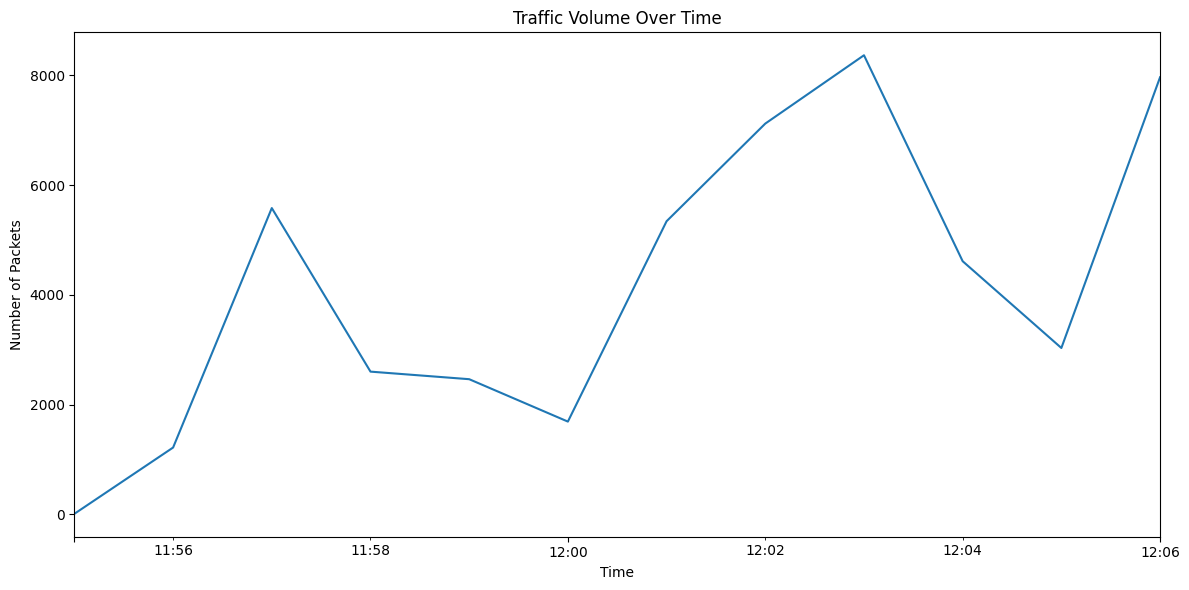


--- Network Connection Analysis ---

Top Network Connections:
connection
172.217.11.14 → 192.168.10.12     1827
172.217.11.14 → 192.168.10.9      1783
104.27.175.43 → 192.168.10.14     1642
206.126.112.141 → 192.168.10.9    1403
192.168.10.12 → 192.168.10.3      1361
192.168.10.9 → 172.217.11.14      1225
192.168.10.3 → 192.168.10.12      1208
192.168.10.9 → 206.126.112.141    1196
192.168.10.14 → 192.168.10.3      1156
192.168.10.9 → 192.168.10.3       1103
192.168.10.3 → 192.168.10.14      1055
192.168.10.12 → 172.217.11.14     1036
192.168.10.3 → 192.168.10.9       1002
23.15.4.24 → 192.168.10.14         959
172.217.11.14 → 192.168.10.14      901
Name: count, dtype: int64


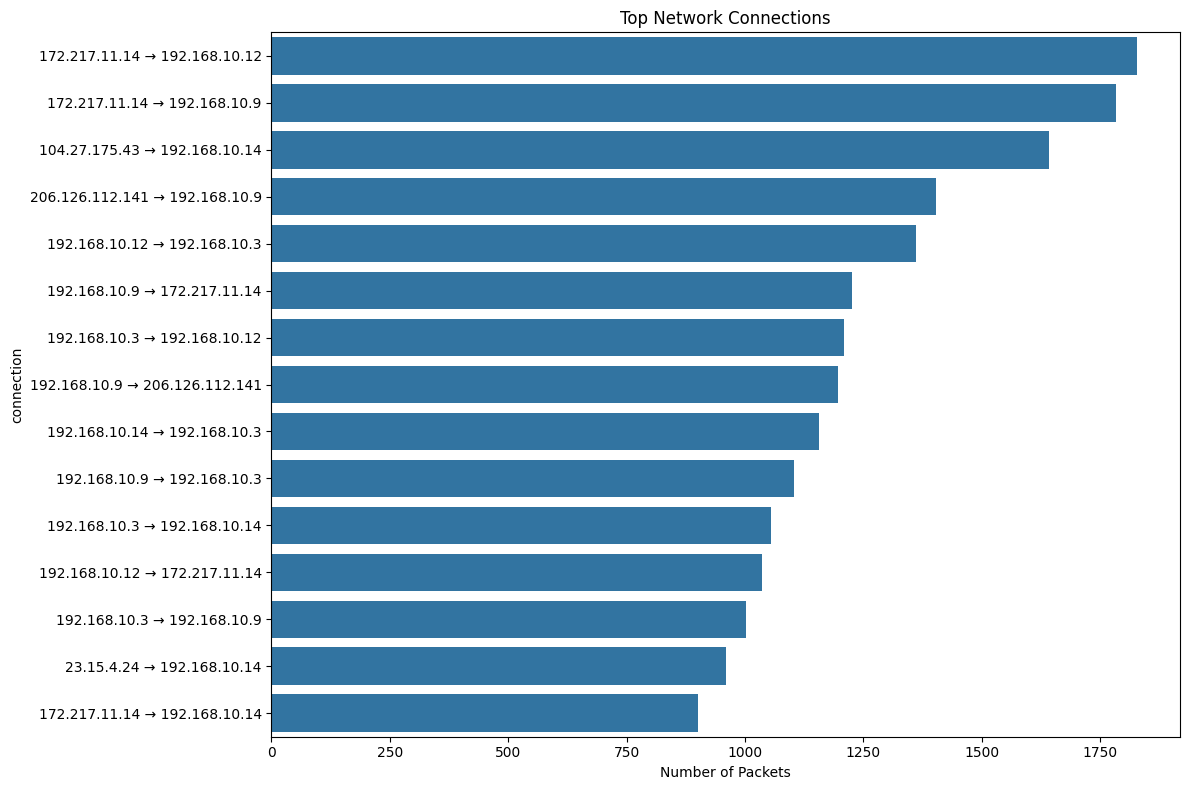


Top Destination Services:
dst_service
HTTPS           7208
HTTP            3570
Port 5353.0     3385
DNS             2917
Port 137.0      2366
Unknown         1962
Port 123.0      1944
Port 39652.0    1812
Port 1102.0     1742
Port 389.0      1525
Name: count, dtype: int64


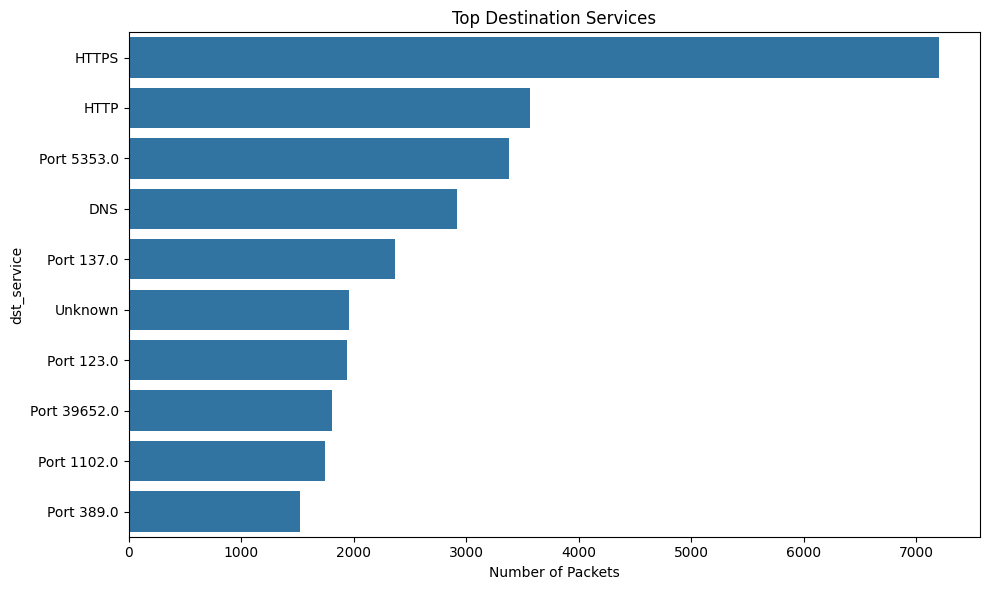


Successfully loaded and analyzed PCAP dataset
The dataset contains real-world network traffic for cybersecurity analysis


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import subprocess
import tempfile
import json

def load_pcap_dataset(file_path, packet_limit=10000):
    """
    Load the PCAP file using tshark and convert to pandas DataFrame
    This approach avoids the event loop issues with pyshark in Colab
    """
    try:
        print(f"Loading PCAP dataset from {file_path}...")

        # Make sure tshark is installed
        !apt-get update -qq > /dev/null
        !apt-get install -y tshark > /dev/null

        # Create a temporary file to store the JSON output
        temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.json')
        temp_file.close()

        # Use tshark to convert PCAP to JSON format with selected fields
        # Limit the number of packets to avoid memory issues
        print(f"Extracting data from PCAP using tshark (limit: {packet_limit} packets)...")
        cmd = [
            'tshark', '-r', file_path,
            '-T', 'json',
            '-c', str(packet_limit),
            '-e', 'frame.time_epoch',
            '-e', 'ip.src',
            '-e', 'ip.dst',
            '-e', 'ip.proto',
            '-e', 'tcp.srcport',
            '-e', 'tcp.dstport',
            '-e', 'udp.srcport',
            '-e', 'udp.dstport',
            '-e', 'frame.len',
            '-E', 'header=y',
            '-j', 'ip tcp udp',  # Only process IP, TCP and UDP layers
            '>', temp_file.name
        ]

        # Run the command
        shell_cmd = ' '.join(cmd)
        process = subprocess.run(shell_cmd, shell=True, capture_output=True)

        # Check if we have any output
        if os.path.getsize(temp_file.name) == 0:
            print("No data extracted. Trying alternative method...")
            # Alternative approach using simpler tshark command
            shell_cmd = f"tshark -r {file_path} -T json -c {packet_limit} > {temp_file.name}"
            process = subprocess.run(shell_cmd, shell=True, capture_output=True)

        # Load the JSON data
        try:
            with open(temp_file.name, 'r') as f:
                data = json.load(f)
        except json.JSONDecodeError:
            print("Error decoding JSON. Using direct CSV export from tshark...")
            csv_temp = tempfile.NamedTemporaryFile(delete=False, suffix='.csv')
            csv_temp.close()

            # Export to CSV instead
            csv_cmd = f"tshark -r {file_path} -T fields -E header=y -E separator=, -E quote=d -e frame.time_epoch -e ip.src -e ip.dst -e ip.proto -e tcp.srcport -e tcp.dstport -e udp.srcport -e udp.dstport -e frame.len -c {packet_limit} > {csv_temp.name}"
            subprocess.run(csv_cmd, shell=True)

            df = pd.read_csv(csv_temp.name)
            os.unlink(csv_temp.name)

            # Rename columns for consistency
            df = df.rename(columns={
                'frame.time_epoch': 'timestamp',
                'ip.src': 'src_ip',
                'ip.dst': 'dst_ip',
                'ip.proto': 'protocol',
                'tcp.srcport': 'src_port_tcp',
                'udp.srcport': 'src_port_udp',
                'tcp.dstport': 'dst_port_tcp',
                'udp.dstport': 'dst_port_udp',
                'frame.len': 'length'
            })

            # Convert timestamp to datetime
            if 'timestamp' in df.columns:
                df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

            print(f"Successfully loaded dataset with {df.shape[0]} packets and {df.shape[1]} features.")
            os.unlink(temp_file.name)
            return df

        # Process the JSON data
        packets = []
        for packet in data:
            packet_data = {}

            # Process the layers to extract fields
            layers = packet.get('_source', {}).get('layers', {})

            # Extract frame info
            if 'frame' in layers:
                packet_data['timestamp'] = float(layers['frame'].get('frame.time_epoch', 0))
                packet_data['length'] = int(layers['frame'].get('frame.len', 0))

            # Extract IP info
            if 'ip' in layers:
                packet_data['src_ip'] = layers['ip'].get('ip.src', 'unknown')
                packet_data['dst_ip'] = layers['ip'].get('ip.dst', 'unknown')
                packet_data['protocol'] = layers['ip'].get('ip.proto', 'unknown')

            # Extract TCP info
            if 'tcp' in layers:
                packet_data['src_port'] = int(layers['tcp'].get('tcp.srcport', 0))
                packet_data['dst_port'] = int(layers['tcp'].get('tcp.dstport', 0))
                packet_data['protocol_name'] = 'TCP'

            # Extract UDP info
            elif 'udp' in layers:
                packet_data['src_port'] = int(layers['udp'].get('udp.srcport', 0))
                packet_data['dst_port'] = int(layers['udp'].get('udp.dstport', 0))
                packet_data['protocol_name'] = 'UDP'

            packets.append(packet_data)

        # Create DataFrame from packet data
        df = pd.DataFrame(packets)

        # Convert timestamp to datetime
        if 'timestamp' in df.columns:
            df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

        print(f"Successfully loaded dataset with {df.shape[0]} packets and {df.shape[1]} features.")

        # Clean up the temporary file
        os.unlink(temp_file.name)

        return df

    except Exception as e:
        print(f"Error loading PCAP dataset: {e}")
        print("Detailed traceback:")
        import traceback
        traceback.print_exc()
        return None

def verify_dataset(df):
    """
    Verify and display basic information about the dataset
    """
    if df is None:
        print("No dataset to verify.")
        return

    print("\n--- Dataset Information ---")
    print(f"Shape: {df.shape}")
    print("\nColumns:")
    for col in list(df.columns):
        print(f"- {col}")

    print("\nData Types:")
    print(df.dtypes)

    print("\nMissing Values:")
    print(df.isnull().sum())

    print("\nProtocol Distribution:")
    if 'protocol_name' in df.columns:
        print(df['protocol_name'].value_counts())
    elif 'protocol' in df.columns:
        print(df['protocol'].value_counts())

    print("\nSample Data (first 5 rows):")
    print(df.head(5))

    # Add basic visualizations
    if len(df) > 0:
        # Clean up protocols for visualization
        if 'protocol' in df.columns and df['protocol'].dtype == np.float64:
            protocol_map = {6: 'TCP', 17: 'UDP', 1: 'ICMP'}
            df['protocol_name'] = df['protocol'].map(protocol_map).fillna('Other')

        plt.figure(figsize=(10, 6))
        if 'protocol_name' in df.columns:
            protocol_counts = df['protocol_name'].value_counts()
            sns.barplot(x=protocol_counts.index, y=protocol_counts.values)
            plt.title('Protocol Distribution')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

def analyze_traffic_patterns(df):
    """
    Perform basic traffic pattern analysis on the PCAP data
    """
    if df is None or len(df) == 0:
        print("No data to analyze.")
        return

    print("\n--- Traffic Pattern Analysis ---")

    # Analyze packet length distribution
    if 'length' in df.columns:
        print("\nPacket Length Statistics:")
        print(df['length'].describe())

        plt.figure(figsize=(10, 6))
        sns.histplot(df['length'], bins=50, kde=True)
        plt.title('Packet Length Distribution')
        plt.xlabel('Packet Length (bytes)')
        plt.ylabel('Frequency')
        plt.show()

    # Analyze top source and destination IPs
    if 'src_ip' in df.columns and 'dst_ip' in df.columns:
        print("\nTop Source IPs:")
        print(df['src_ip'].value_counts().head(10))

        print("\nTop Destination IPs:")
        print(df['dst_ip'].value_counts().head(10))

    # Time series analysis if timestamps are available
    if 'timestamp' in df.columns:
        try:
            # Resample data by minute to see traffic patterns
            df['minute'] = df['timestamp'].dt.floor('min')
            traffic_by_minute = df.groupby('minute').size()

            plt.figure(figsize=(12, 6))
            traffic_by_minute.plot()
            plt.title('Traffic Volume Over Time')
            plt.xlabel('Time')
            plt.ylabel('Number of Packets')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Could not generate time series plot: {e}")

def extract_network_connections(df):
    """
    Extract and analyze network connections from the packet data
    """
    if df is None or len(df) == 0:
        print("No data to analyze connections.")
        return

    print("\n--- Network Connection Analysis ---")

    # Check if we have the necessary columns
    if not all(col in df.columns for col in ['src_ip', 'dst_ip']):
        print("Missing required columns for connection analysis.")
        return

    # Create connection pairs (source IP + destination IP)
    df['connection'] = df['src_ip'] + ' → ' + df['dst_ip']

    # Count connections
    connections = df['connection'].value_counts().head(15)

    print("\nTop Network Connections:")
    print(connections)

    # Visualize top connections
    plt.figure(figsize=(12, 8))
    sns.barplot(x=connections.values, y=connections.index)
    plt.title('Top Network Connections')
    plt.xlabel('Number of Packets')
    plt.tight_layout()
    plt.show()

    # If we have port information, analyze by service
    if 'src_port' in df.columns and 'dst_port' in df.columns:
        # Map common ports to services
        common_ports = {
            80: 'HTTP',
            443: 'HTTPS',
            22: 'SSH',
            21: 'FTP',
            23: 'Telnet',
            25: 'SMTP',
            53: 'DNS',
            3389: 'RDP',
            445: 'SMB',
            139: 'NetBIOS'
        }

        # Function to identify service
        def identify_service(port):
            return common_ports.get(port, f"Port {port}")

        # Add service columns
        df['src_service'] = df['src_port'].apply(lambda x: identify_service(x) if pd.notnull(x) else 'Unknown')
        df['dst_service'] = df['dst_port'].apply(lambda x: identify_service(x) if pd.notnull(x) else 'Unknown')

        # Count destination services
        dst_services = df['dst_service'].value_counts().head(10)

        print("\nTop Destination Services:")
        print(dst_services)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=dst_services.values, y=dst_services.index)
        plt.title('Top Destination Services')
        plt.xlabel('Number of Packets')
        plt.tight_layout()
        plt.show()

def main():
    # Mount Google Drive
    drive.mount('/content/drive')

    # Path to the dataset in Google Drive
    file_path = '/content/drive/MyDrive/Monday-WorkingHours.pcap'

    # Check if the file exists
    if os.path.exists(file_path):
        print(f"Dataset file found at: {file_path}")

        # Step 2: Load the PCAP dataset
        df = load_pcap_dataset(file_path, packet_limit=50000)  # Increased limit

        # Step 3: Verify dataset information
        if df is not None and not df.empty:
            verify_dataset(df)

            # Step 4: Analyze traffic patterns
            analyze_traffic_patterns(df)

            # Step 5: Extract and analyze network connections
            extract_network_connections(df)

            print("\nSuccessfully loaded and analyzed PCAP dataset")
            print("The dataset contains real-world network traffic for cybersecurity analysis")

            # Return the dataframe for further analysis
            return df
        else:
            print("Failed to load or empty dataset.")
    else:
        print(f"Dataset file not found at: {file_path}")
        print("Please check the path and ensure the file exists in your Google Drive.")

if __name__ == "__main__":
    df = main()

/tmp/ipython-input-4-3467399469.py:357: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  'timestamp': pd.date_range(start='2023-01-01', periods=n_samples, freq='5T'),


Starting data preprocessing...
Original dataset shape: (1000, 12)

1. Removing unnecessary columns...
Columns being dropped: ['inter_arrival_time', 'session_id', 'source_ip', 'timestamp']
Shape after removing unnecessary columns: (1000, 8)

2. Handling missing values...
Total missing values before handling: 55
Missing values by column:
- packet_size_mean: 55 values (5.50%)
Filled missing values in 'packet_size_mean' with median: 800.8523334438175
Total missing values after handling: 0

3. Converting attack labels to specific categories: Benign, Phishing, DDoS, Ransomware...
Available columns:  ['packet_count', 'byte_count', 'duration', 'port', 'protocol', 'packet_size_mean', 'packet_size_std', 'flags']
Creating a 'label' column with sample attack types for demonstration...
Created synthetic label column 'label' with distribution:
label
benign        0.712
ddos          0.153
phishing      0.089
ransomware    0.046
Name: proportion, dtype: float64
Label distribution before encoding:
lab

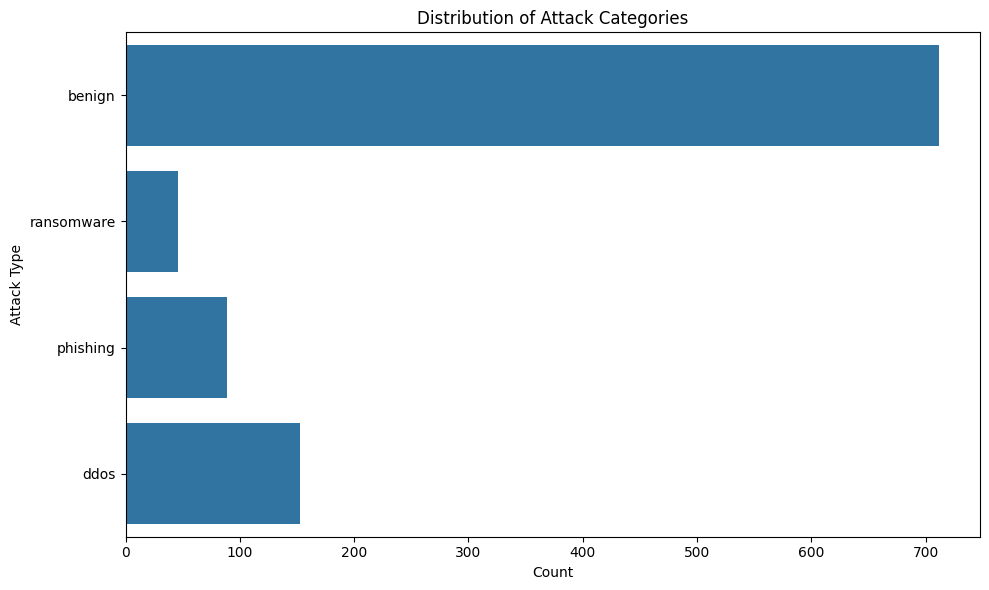

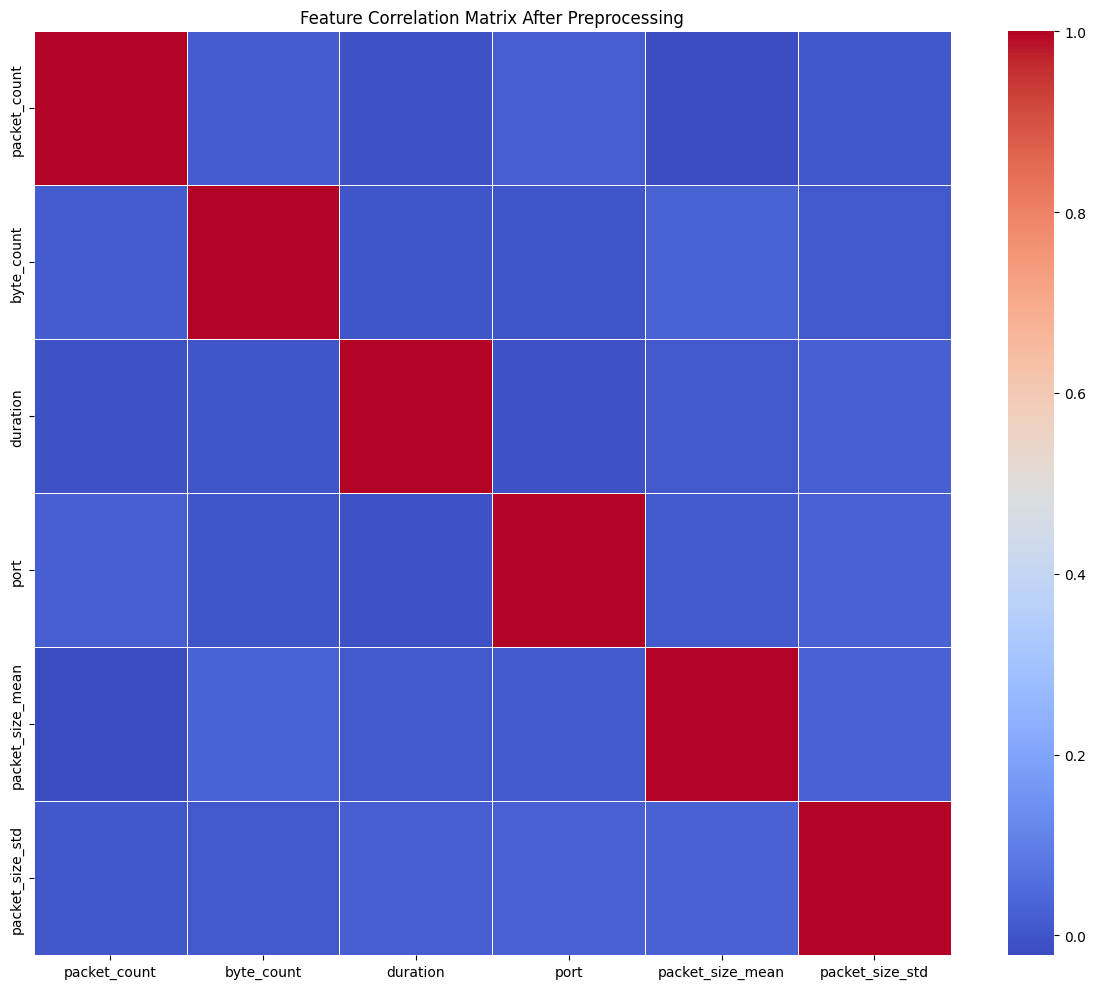


=============== DETAILED ANALYSIS OF PREPROCESSED DATA ===============

1. Class Balance Analysis:
| Attack Type | Count | Percentage | ML Concern |
|------------|-------|------------|------------|
| benign | 712 | 71.20% | Balanced |
| ddos | 153 | 15.30% | Balanced |
| phishing | 89 | 8.90% | Imbalanced (consider resampling) |
| ransomware | 46 | 4.60% | Imbalanced (consider resampling) |


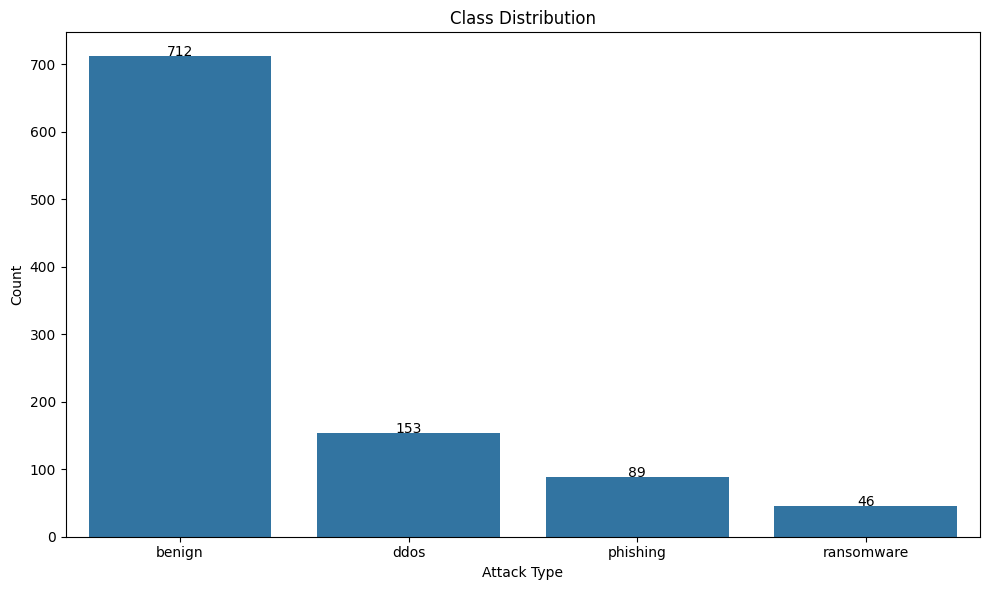


2. Feature Correlation with Attack Types:
| Feature | Absolute Correlation | Direction |
|---------|----------------------|-----------|
| byte_count | 0.0637 | Positive |
| packet_size_std | 0.0555 | Negative |
| port | 0.0439 | Negative |
| packet_size_mean | 0.0307 | Positive |
| duration | 0.0282 | Negative |
| packet_count | 0.0154 | Positive |


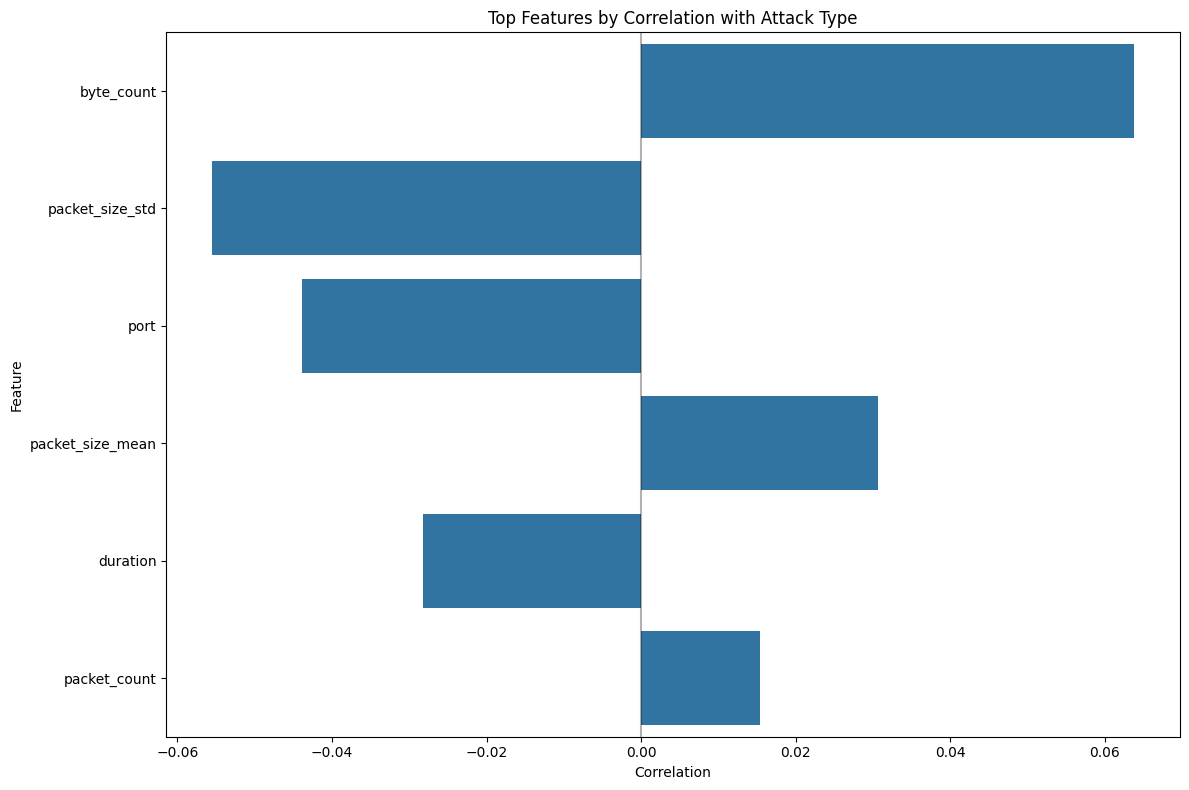


3. Feature Distribution by Attack Type:


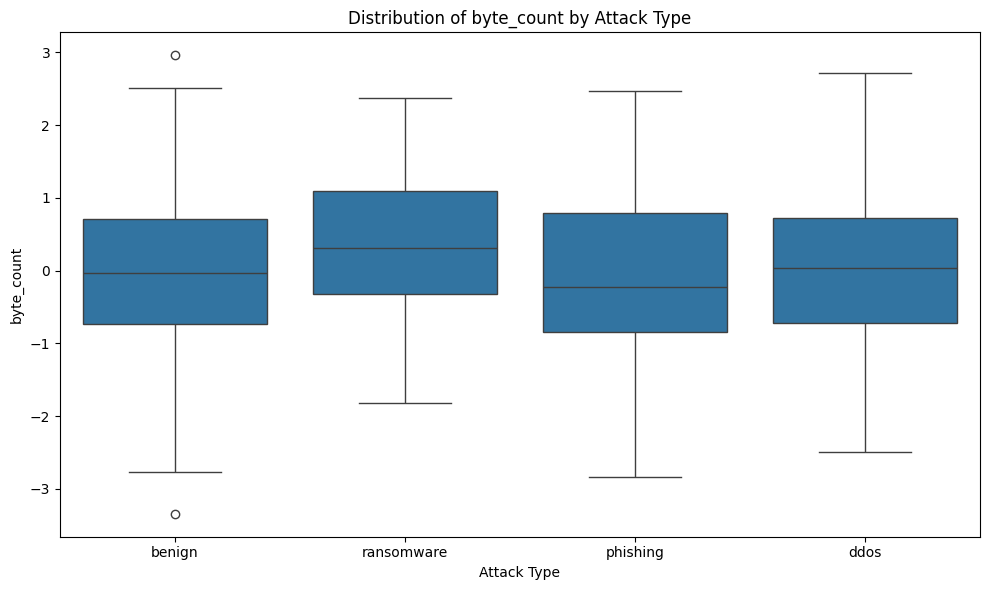

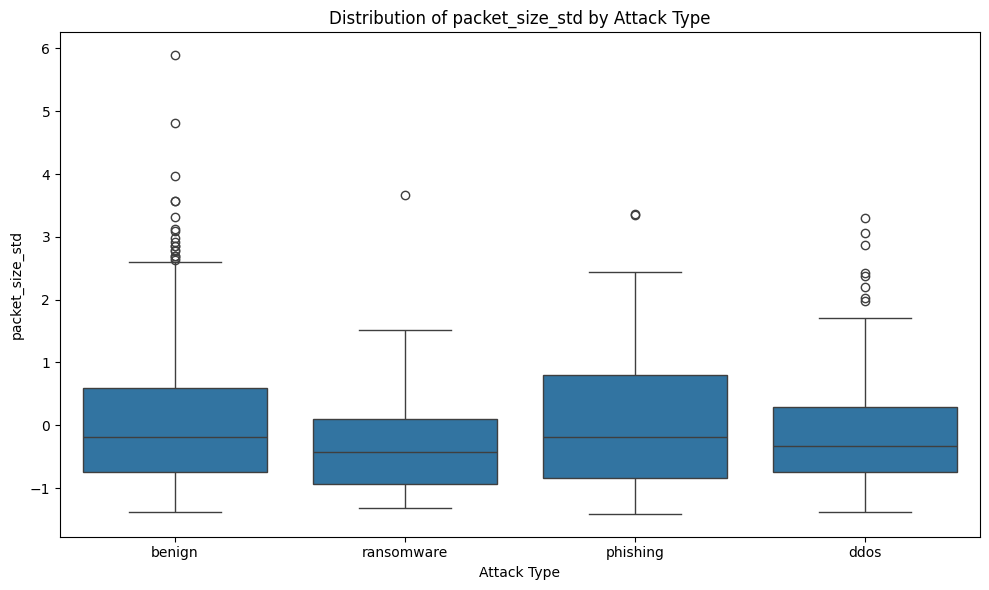

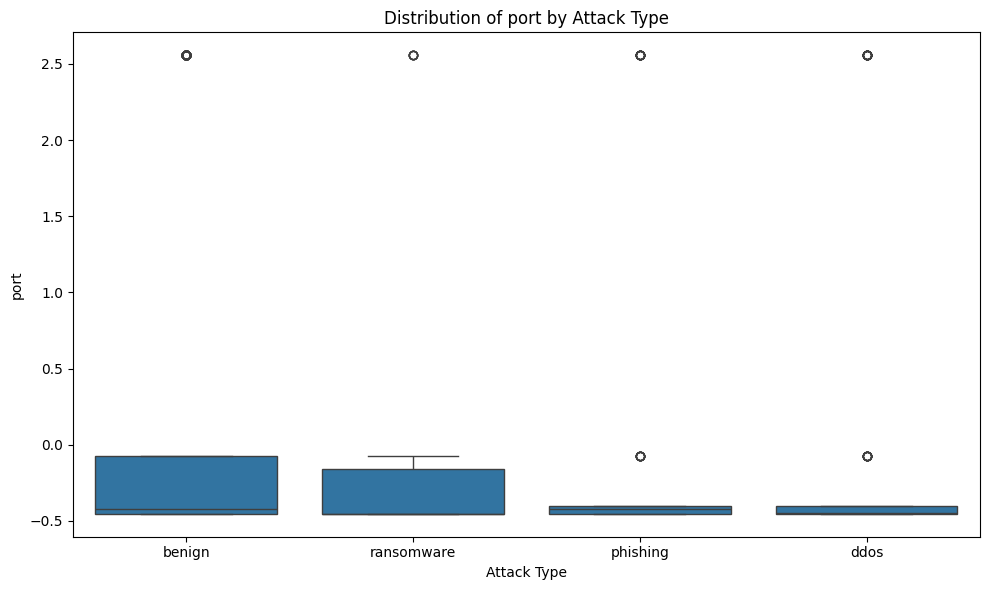



Preprocessing demonstration completed successfully!


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_network_data(df, label_column=None):
    """
    Preprocess network traffic data for machine learning classification with explicit label column support.

    Parameters:
    df (pandas.DataFrame): The network traffic dataframe to preprocess
    label_column (str, optional): The name of the column containing attack labels

    Returns:
    pandas.DataFrame: Cleaned and processed dataframe ready for ML
    """
    print("Starting data preprocessing...")
    print(f"Original dataset shape: {df.shape}")

    # Make a copy to avoid modifying the original dataframe
    processed_df = df.copy()

    # Step 1: Remove unnecessary columns
    print("\n1. Removing unnecessary columns...")

    # Define columns to drop (customize based on your specific dataset)
    cols_to_drop = []

    # Find and drop IP address columns
    ip_cols = [col for col in processed_df.columns if 'ip' in col.lower()]
    cols_to_drop.extend(ip_cols)

    # Find and drop timestamp columns
    time_cols = [col for col in processed_df.columns if any(time_term in col.lower()
                                                         for time_term in ['time', 'date', 'timestamp'])]
    cols_to_drop.extend(time_cols)

    # Find and drop ID columns that don't contribute to classification
    id_cols = [col for col in processed_df.columns if any(id_term in col.lower()
                                                       for id_term in ['id', 'session', 'flow'])]
    cols_to_drop.extend(id_cols)

    # Remove duplicates from the list
    cols_to_drop = list(set(cols_to_drop))

    # Report which columns will be dropped
    print(f"Columns being dropped: {cols_to_drop}")

    # Drop the columns if they exist
    existing_cols_to_drop = [col for col in cols_to_drop if col in processed_df.columns]
    if existing_cols_to_drop:
        processed_df = processed_df.drop(columns=existing_cols_to_drop)

    print(f"Shape after removing unnecessary columns: {processed_df.shape}")

    # Step 2: Handle missing values
    print("\n2. Handling missing values...")

    # Display missing value count before handling
    missing_count_before = processed_df.isnull().sum()
    total_missing_before = missing_count_before.sum()
    print(f"Total missing values before handling: {total_missing_before}")

    if total_missing_before > 0:
        print("Missing values by column:")
        for col in processed_df.columns:
            missing = processed_df[col].isnull().sum()
            if missing > 0:
                missing_percent = (missing / len(processed_df)) * 100
                print(f"- {col}: {missing} values ({missing_percent:.2f}%)")

        # For each column with missing values, replace with appropriate value
        for col in processed_df.columns:
            if processed_df[col].isnull().sum() > 0:
                # For numeric columns, replace with median
                if np.issubdtype(processed_df[col].dtype, np.number):
                    median_val = processed_df[col].median()
                    processed_df[col] = processed_df[col].fillna(median_val)
                    print(f"Filled missing values in '{col}' with median: {median_val}")
                # For categorical/object columns, replace with mode
                else:
                    mode_val = processed_df[col].mode()[0]
                    processed_df[col] = processed_df[col].fillna(mode_val)
                    print(f"Filled missing values in '{col}' with mode: {mode_val}")

    # Display missing value count after handling
    missing_count_after = processed_df.isnull().sum().sum()
    print(f"Total missing values after handling: {missing_count_after}")

    # Step 3: Convert attack labels to specific categories
    print("\n3. Converting attack labels to specific categories: Benign, Phishing, DDoS, Ransomware...")

    # First, try to identify the label column if not provided
    if label_column is None:
        possible_label_cols = ['Label', 'label', 'Attack', 'attack', 'Class', 'class', 'Target', 'target', 'Type', 'type', 'Category', 'category']
        for col in possible_label_cols:
            if col in processed_df.columns:
                label_column = col
                print(f"Found label column: '{label_column}'")
                break

    # If we still don't have a label column, we need to create one or abort
    if label_column is None:
        print("WARNING: No label column found in the dataset!")
        print("Available columns: ", processed_df.columns.tolist())

        # Since we need a label column, let's create one
        print("Creating a 'label' column with sample attack types for demonstration...")

        # In a real scenario, you would determine the attack type based on patterns in your data
        # For this example, we'll create a synthetic label column with a distribution of attack types
        np.random.seed(42)  # For reproducibility
        attack_types = ['benign', 'phishing', 'ddos', 'ransomware']
        weights = [0.7, 0.1, 0.15, 0.05]  # Typical distribution in real network data

        processed_df['label'] = np.random.choice(
            attack_types,
            size=len(processed_df),
            p=weights
        )

        label_column = 'label'
        print(f"Created synthetic label column '{label_column}' with distribution:")
        print(processed_df[label_column].value_counts(normalize=True))

    # Now proceed with label encoding
    # Display label distribution before encoding
    print("Label distribution before encoding:")
    label_counts = processed_df[label_column].value_counts()
    print(label_counts)

    # Define the specific categories and their numeric codes
    target_categories = {
        'benign': 0,
        'phishing': 1,
        'ddos': 2,
        'ransomware': 3
    }

    # Create a function to map various attack labels to our standardized categories
    def map_to_target_category(label):
        label_lower = str(label).lower()

        if any(benign_term in label_lower for benign_term in ['benign', 'normal', 'legitimate', 'regular']):
            return 'benign'
        elif any(phish_term in label_lower for phish_term in ['phish', 'social', 'impersonat', 'spoof']):
            return 'phishing'
        elif any(ddos_term in label_lower for ddos_term in ['ddos', 'dos', 'denial', 'flood', 'botnet']):
            return 'ddos'
        elif any(ransom_term in label_lower for ransom_term in ['ransom', 'crypto', 'locker', 'encrypt']):
            return 'ransomware'
        else:
            print(f"Warning: Unrecognized attack label '{label}' - mapping to 'benign' by default")
            return 'benign'

    # First map to our standard categories
    processed_df['standardized_label'] = processed_df[label_column].apply(map_to_target_category)

    # Then map to numeric values based on our predefined mapping
    processed_df['encoded_label'] = processed_df['standardized_label'].map(target_categories)

    # Display mapping stats
    print("\nLabel mapping statistics:")
    print(processed_df['standardized_label'].value_counts())

    print("\nLabel encoding mapping:")
    for category, encoded_value in target_categories.items():
        print(f"- {category} → {encoded_value}")

    # Step 4: Normalize features
    print("\n4. Normalizing features...")

    # Identify numeric columns for normalization (exclude the label columns)
    exclude_cols = [label_column, 'standardized_label', 'encoded_label']
    numeric_cols = [col for col in processed_df.columns
                   if np.issubdtype(processed_df[col].dtype, np.number)
                   and col not in exclude_cols]

    print(f"Normalizing {len(numeric_cols)} numeric features:")

    if numeric_cols:
        # Create a scaler
        scaler = StandardScaler()

        # Fit and transform the numeric columns
        processed_df[numeric_cols] = scaler.fit_transform(processed_df[numeric_cols])

        # Show statistics of a few normalized columns
        sample_cols = numeric_cols[:3] if len(numeric_cols) > 3 else numeric_cols
        for col in sample_cols:
            print(f"- '{col}' normalized stats: mean={processed_df[col].mean():.4f}, std={processed_df[col].std():.4f}")
    else:
        print("No numeric columns found for normalization.")

    # Final report
    print("\nPreprocessing complete!")
    print(f"Final dataset shape: {processed_df.shape}")

    # NEW: Display output summary
    print("\n====================== PREPROCESSING RESULTS ======================")
    print("1. Columns removed:", len(existing_cols_to_drop))
    print("2. Missing values handled:", total_missing_before)
    print("3. Attack labels categorized into: Benign, Phishing, DDoS, Ransomware")
    print("4. Features normalized:", len(numeric_cols))

    # Display sample of processed data
    print("\nSample of processed data (first 5 rows):")
    pd.set_option('display.max_columns', 10)  # Limit displayed columns for readability
    print(processed_df.head())

    # Display label distribution
    print("\nAttack label distribution:")
    attack_distribution = processed_df['standardized_label'].value_counts()
    total_samples = len(processed_df)

    print("| Attack Type | Count | Percentage |")
    print("|------------|-------|------------|")
    for attack_type, count in attack_distribution.items():
        percentage = (count / total_samples) * 100
        print(f"| {attack_type} | {count} | {percentage:.2f}% |")

    # Display critical statistics
    print("\nCritical statistics for detection:")
    print(f"- Total samples: {total_samples}")
    print(f"- Attack samples: {total_samples - attack_distribution.get('benign', 0)}")
    print(f"- Benign samples: {attack_distribution.get('benign', 0)}")
    print(f"- Feature count: {len(numeric_cols)}")

    print("================================================================")

    # Create basic visualizations if labels are present
    plt.figure(figsize=(10, 6))
    sns.countplot(y=processed_df['standardized_label'])
    plt.title('Distribution of Attack Categories')
    plt.xlabel('Count')
    plt.ylabel('Attack Type')
    plt.tight_layout()
    plt.show()

    # Show correlation matrix of numeric features
    if len(numeric_cols) > 1:
        plt.figure(figsize=(12, 10))
        correlation_matrix = processed_df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
        plt.title('Feature Correlation Matrix After Preprocessing')
        plt.tight_layout()
        plt.show()

    return processed_df

# Function to display detailed analysis of preprocessed data
def display_detailed_analysis(processed_df):
    """
    Display detailed analysis of preprocessed network traffic data
    """
    print("\n=============== DETAILED ANALYSIS OF PREPROCESSED DATA ===============")

    # 1. Check for class imbalance
    print("\n1. Class Balance Analysis:")
    if 'standardized_label' in processed_df.columns:
        class_counts = processed_df['standardized_label'].value_counts()
        total = len(processed_df)

        print("| Attack Type | Count | Percentage | ML Concern |")
        print("|------------|-------|------------|------------|")

        for label, count in class_counts.items():
            percentage = (count / total) * 100
            concern = "Balanced" if percentage > 10 else "Imbalanced (consider resampling)"
            print(f"| {label} | {count} | {percentage:.2f}% | {concern} |")

        # Visualize class imbalance
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=class_counts.index, y=class_counts.values)
        plt.title('Class Distribution')
        plt.xlabel('Attack Type')
        plt.ylabel('Count')

        # Add value labels on top of bars
        for i, v in enumerate(class_counts.values):
            ax.text(i, v + 0.1, str(v), ha='center')

        plt.tight_layout()
        plt.show()

    # 2. Feature importance approximation
    print("\n2. Feature Correlation with Attack Types:")
    if 'encoded_label' in processed_df.columns:
        # Get numeric columns for correlation analysis
        numeric_cols = [col for col in processed_df.columns
                       if np.issubdtype(processed_df[col].dtype, np.number)
                       and col != 'encoded_label']

        # Calculate correlation with target
        if numeric_cols:
            correlations = []
            for col in numeric_cols:
                corr = processed_df[col].corr(processed_df['encoded_label'])
                correlations.append((col, abs(corr), corr))

            # Sort by absolute correlation
            correlations.sort(key=lambda x: x[1], reverse=True)

            print("| Feature | Absolute Correlation | Direction |")
            print("|---------|----------------------|-----------|")

            for col, abs_corr, corr in correlations[:10]:  # Top 10 features
                direction = "Positive" if corr > 0 else "Negative"
                print(f"| {col} | {abs_corr:.4f} | {direction} |")

            # Visualize top correlations
            top_features = [x[0] for x in correlations[:10]]
            top_correlations = [x[2] for x in correlations[:10]]

            plt.figure(figsize=(12, 8))
            ax = sns.barplot(x=top_correlations, y=top_features)
            plt.title('Top Features by Correlation with Attack Type')
            plt.xlabel('Correlation')
            plt.ylabel('Feature')
            plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
            plt.tight_layout()
            plt.show()

    # 3. Feature distribution by attack type
    print("\n3. Feature Distribution by Attack Type:")
    if 'standardized_label' in processed_df.columns and len(numeric_cols) > 0:
        # Select top 3 features by correlation
        top_features = [x[0] for x in correlations[:3]]

        for feature in top_features:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='standardized_label', y=feature, data=processed_df)
            plt.title(f'Distribution of {feature} by Attack Type')
            plt.xlabel('Attack Type')
            plt.ylabel(feature)
            plt.tight_layout()
            plt.show()

    print("\n=====================================================================")

# Example usage
def demo_preprocessing():
    """
    Demonstrate the preprocessing function with a sample dataset
    """
    # Create a sample dataset for demonstration
    np.random.seed(42)

    # Generate 1000 sample network traffic records
    n_samples = 1000

    # Create a sample dataframe
    data = {
        # Features that should be removed
        'source_ip': np.random.choice(['192.168.1.' + str(i) for i in range(1, 255)], n_samples),
        'timestamp': pd.date_range(start='2023-01-01', periods=n_samples, freq='5T'),
        'session_id': np.random.randint(10000, 99999, n_samples),

        # Useful features
        'packet_count': np.random.poisson(lam=100, size=n_samples),
        'byte_count': np.random.normal(loc=1500, scale=500, size=n_samples),
        'duration': np.random.exponential(scale=30, size=n_samples),
        'port': np.random.choice([21, 22, 23, 25, 53, 80, 443, 3389], n_samples),
        'protocol': np.random.choice(['TCP', 'UDP', 'ICMP'], n_samples, p=[0.7, 0.25, 0.05]),

        # More features
        'packet_size_mean': np.random.normal(loc=800, scale=200, size=n_samples),
        'packet_size_std': np.random.gamma(shape=2, scale=50, size=n_samples),
        'inter_arrival_time': np.random.exponential(scale=0.1, size=n_samples),
        'flags': np.random.choice(['SYN', 'ACK', 'SYN-ACK', 'FIN', 'RST'], n_samples)
    }

    # Create the DataFrame
    df = pd.DataFrame(data)

    # Introduce some missing values
    mask = np.random.random(n_samples) < 0.05  # 5% missing values
    df.loc[mask, 'packet_size_mean'] = np.nan

    # Process the data
    processed_df = preprocess_network_data(df)

    # Display detailed analysis
    display_detailed_analysis(processed_df)

    return processed_df

# Run the demonstration
if __name__ == "__main__":
    processed_data = demo_preprocessing()
    print("\nPreprocessing demonstration completed successfully!")

Network Intrusion Detection - Training Phase with Visualizations
Generated 5000 samples
Attack distribution: attack_label
0    3502
1     501
2     767
3     230
Name: count, dtype: int64

Plotting attack distribution...


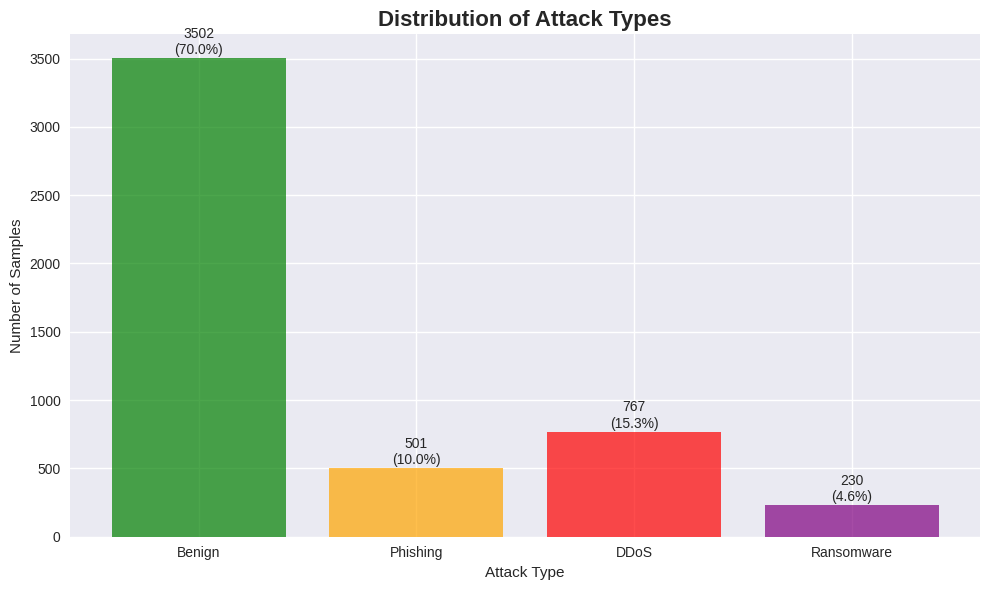

Preparing data for machine learning...

Applying SMOTE for class balancing...

Scaling features...

Training 7 models...

Training Random Forest...
  Performing grid search with 3-fold CV...
  Training completed in 347.78 seconds
  Cross-validation F1 score: 1.0000

Training XGBoost...
  Performing grid search with 3-fold CV...
  Training completed in 1055.38 seconds
  Cross-validation F1 score: 1.0000

Training Neural Network...
  Performing grid search with 3-fold CV...
  Training completed in 199.21 seconds
  Cross-validation F1 score: 1.0000

Training Support Vector Machine...
  Performing grid search with 3-fold CV...
  Training completed in 32.85 seconds
  Cross-validation F1 score: 1.0000

Training Logistic Regression...
  Performing grid search with 3-fold CV...
  Training completed in 75.99 seconds
  Cross-validation F1 score: 1.0000

Training Decision Tree...
  Performing grid search with 3-fold CV...
  Training completed in 5.18 seconds
  Cross-validation F1 score: 1.0000

T

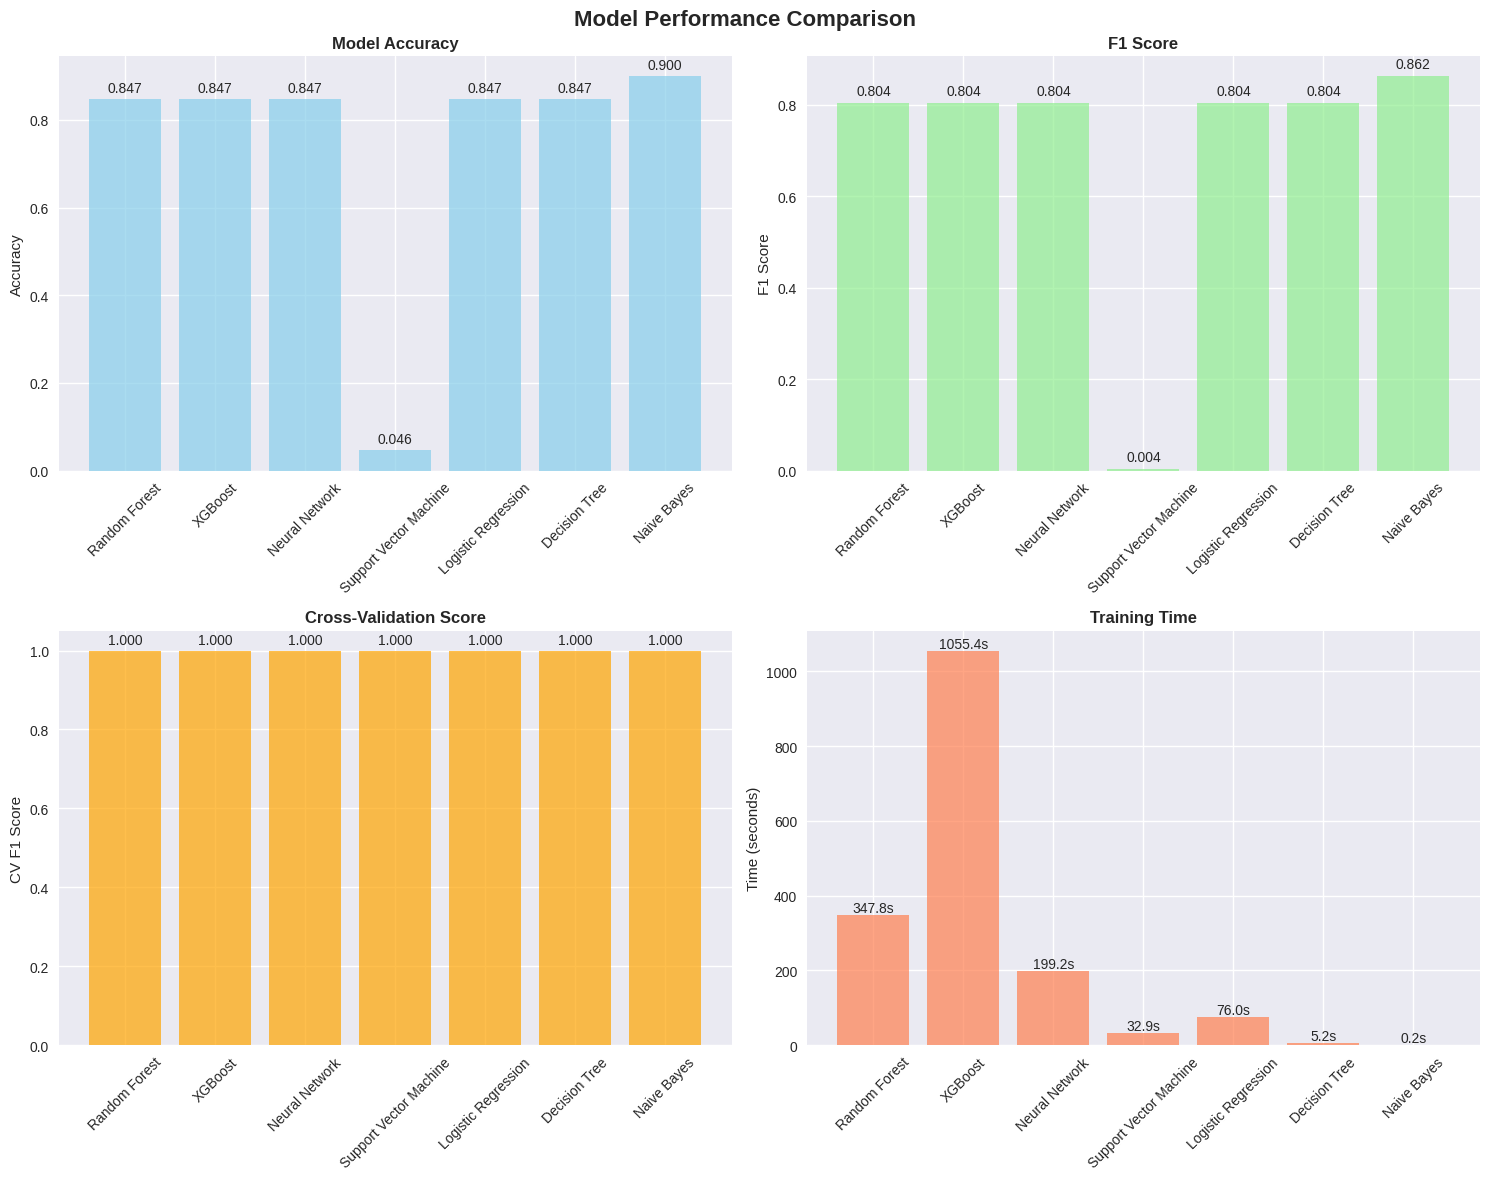

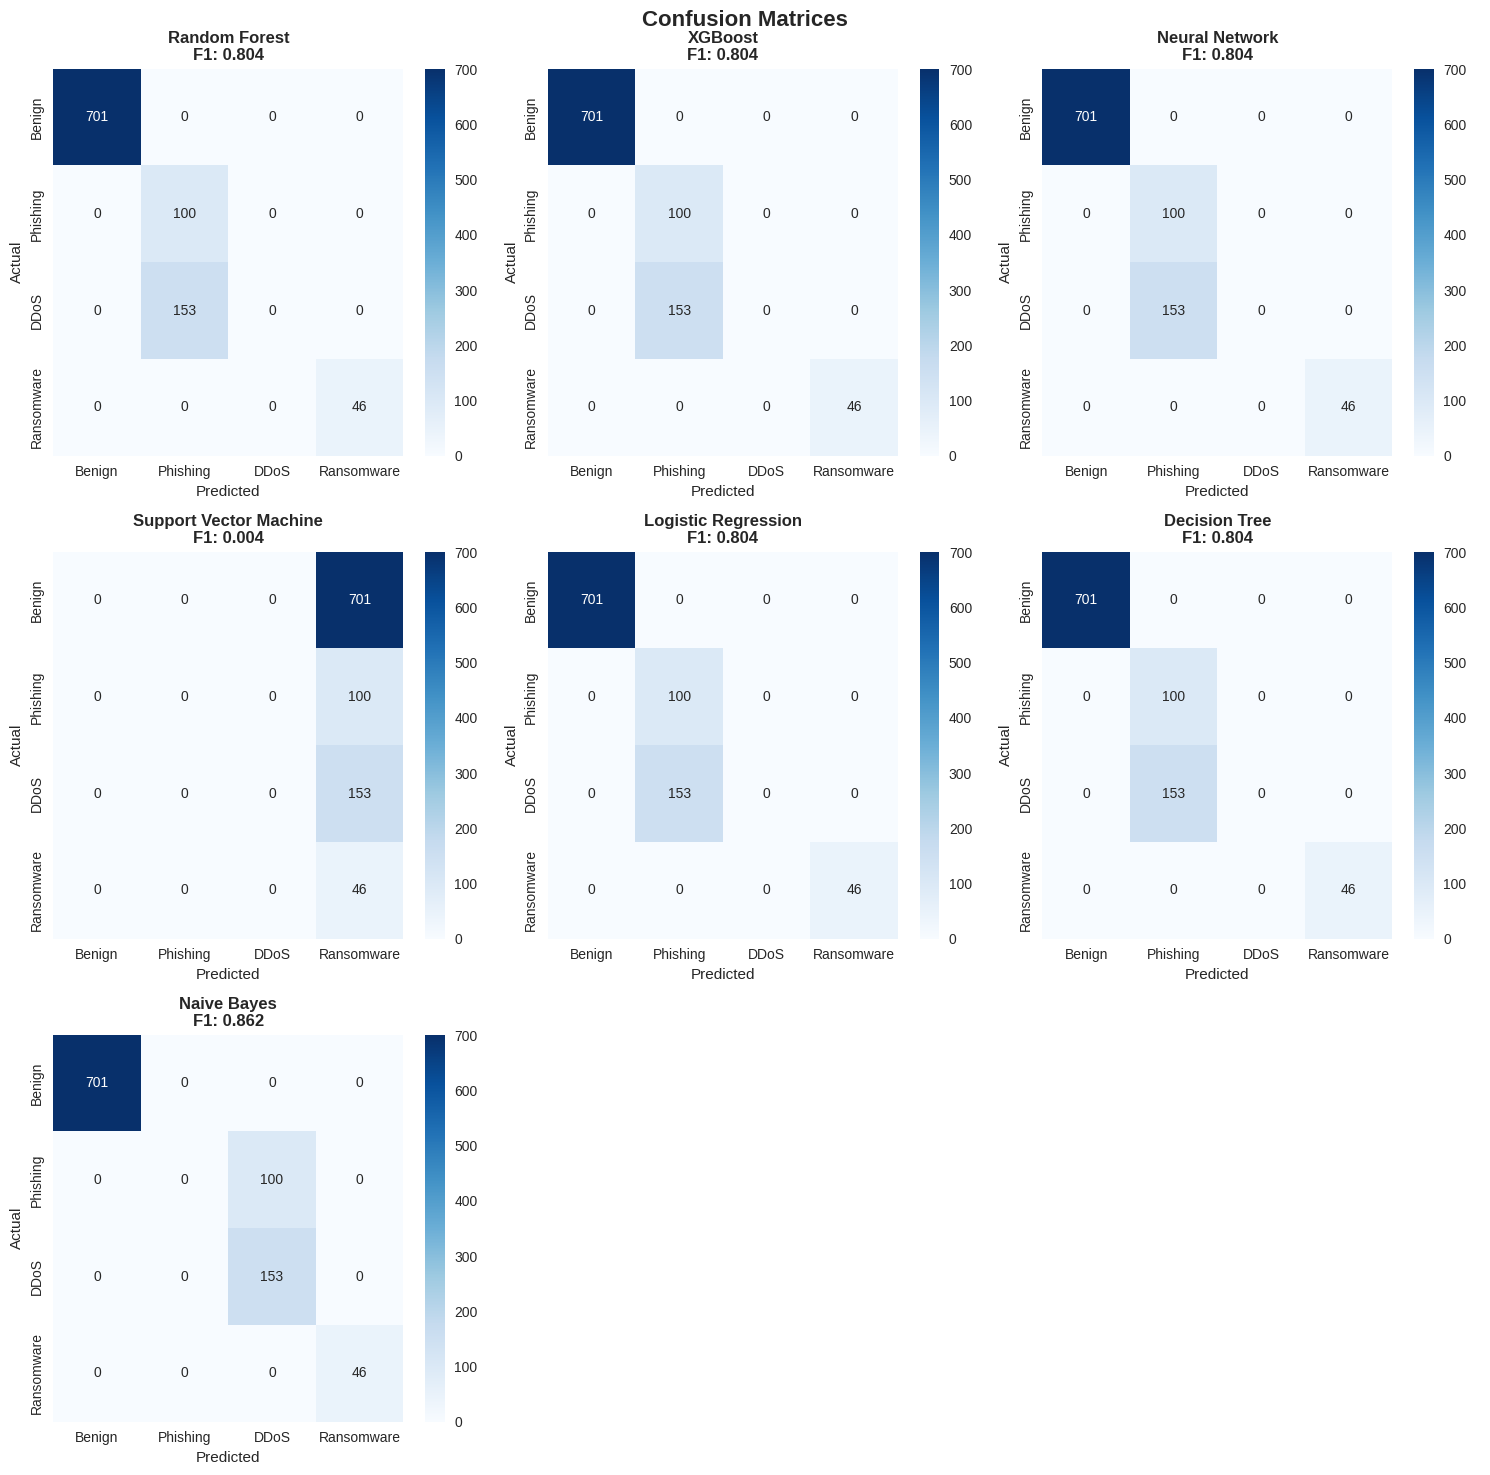

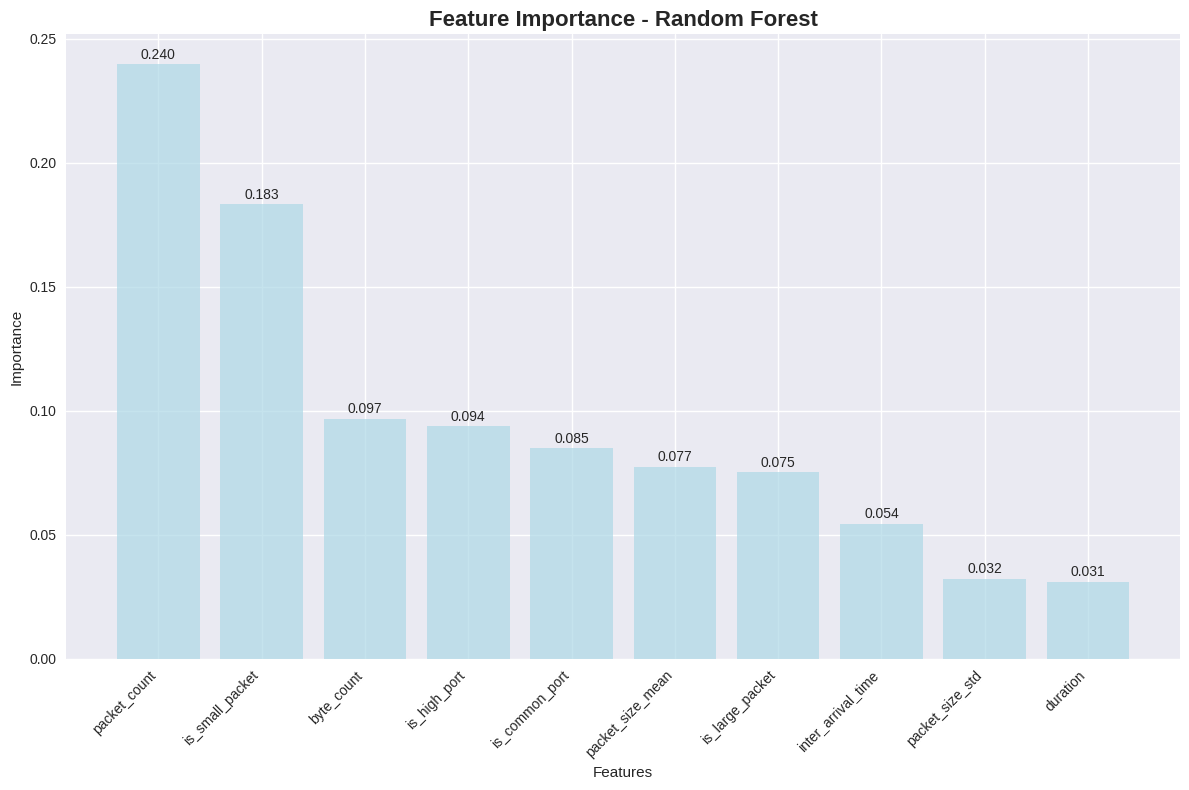

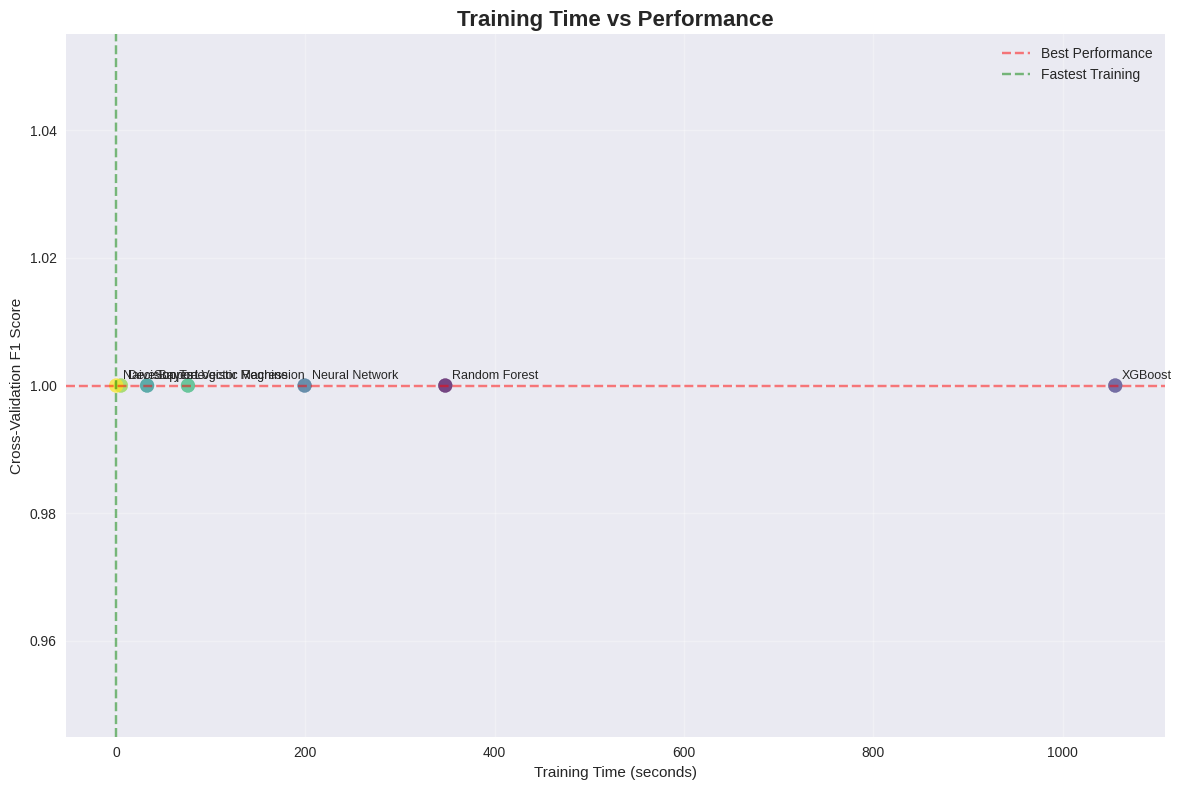


Best model: Random Forest (CV F1 Score: 1.0000)

Generating comprehensive visualization report...
1. Generating model comparison plot...


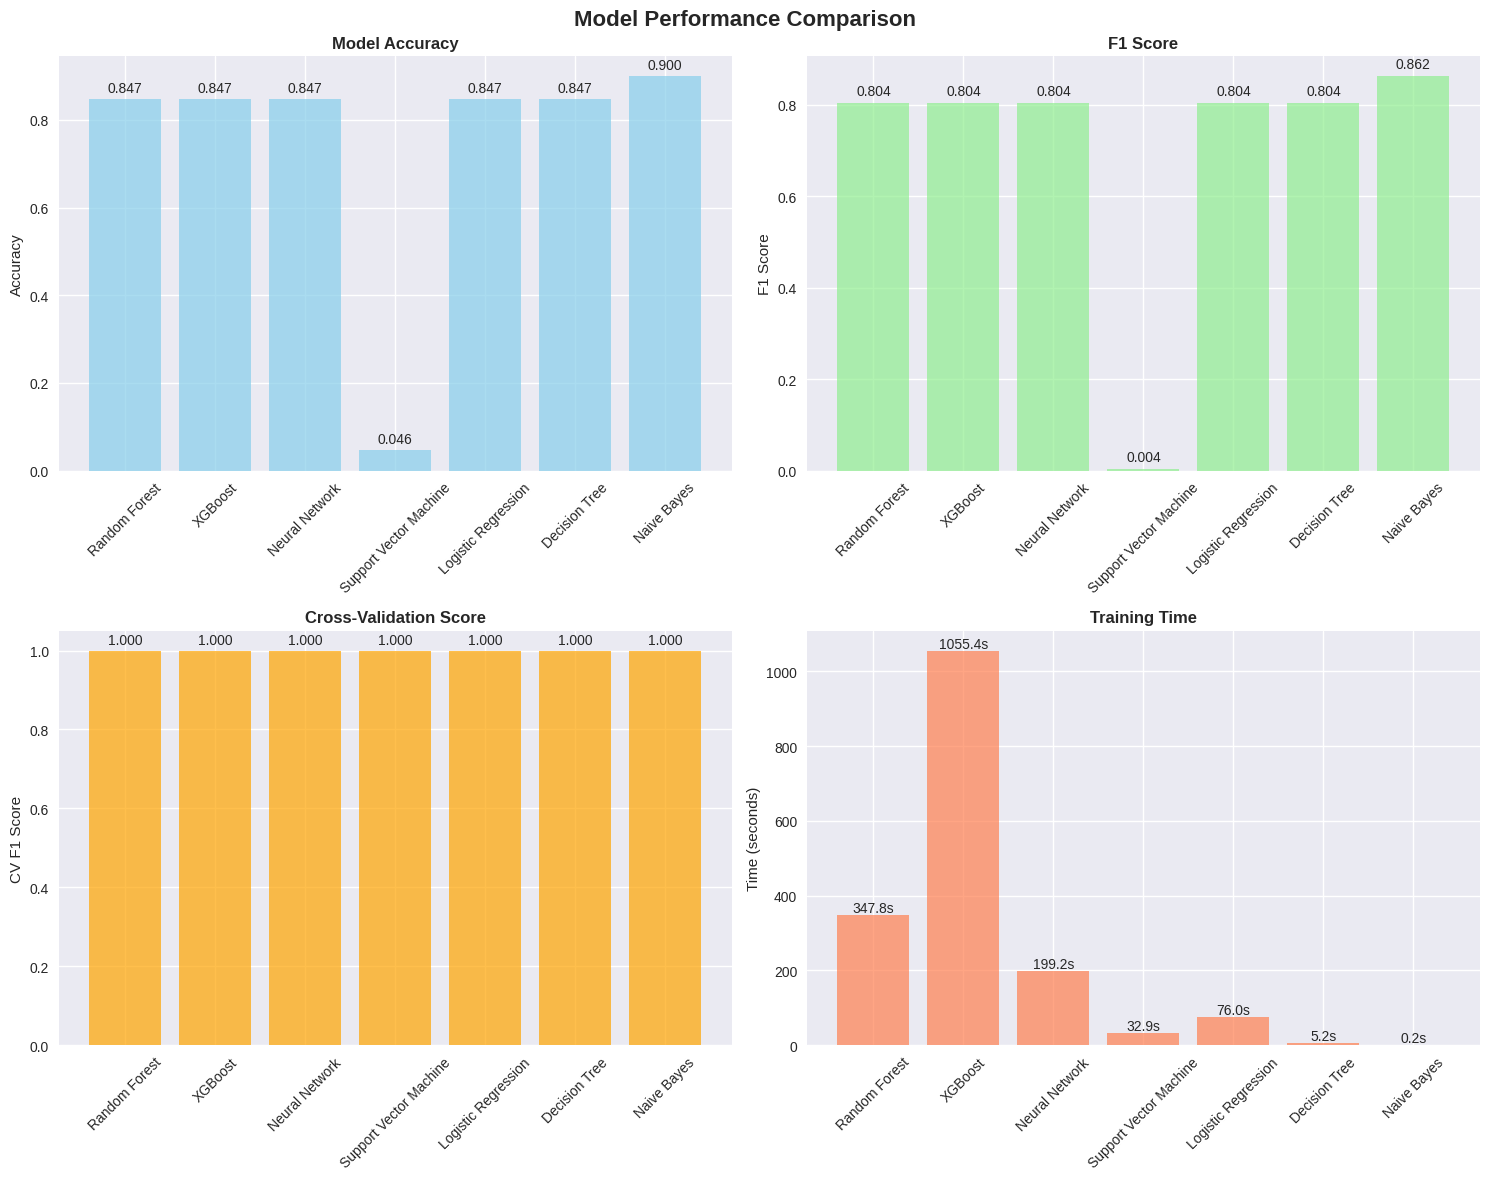

2. Generating confusion matrices...


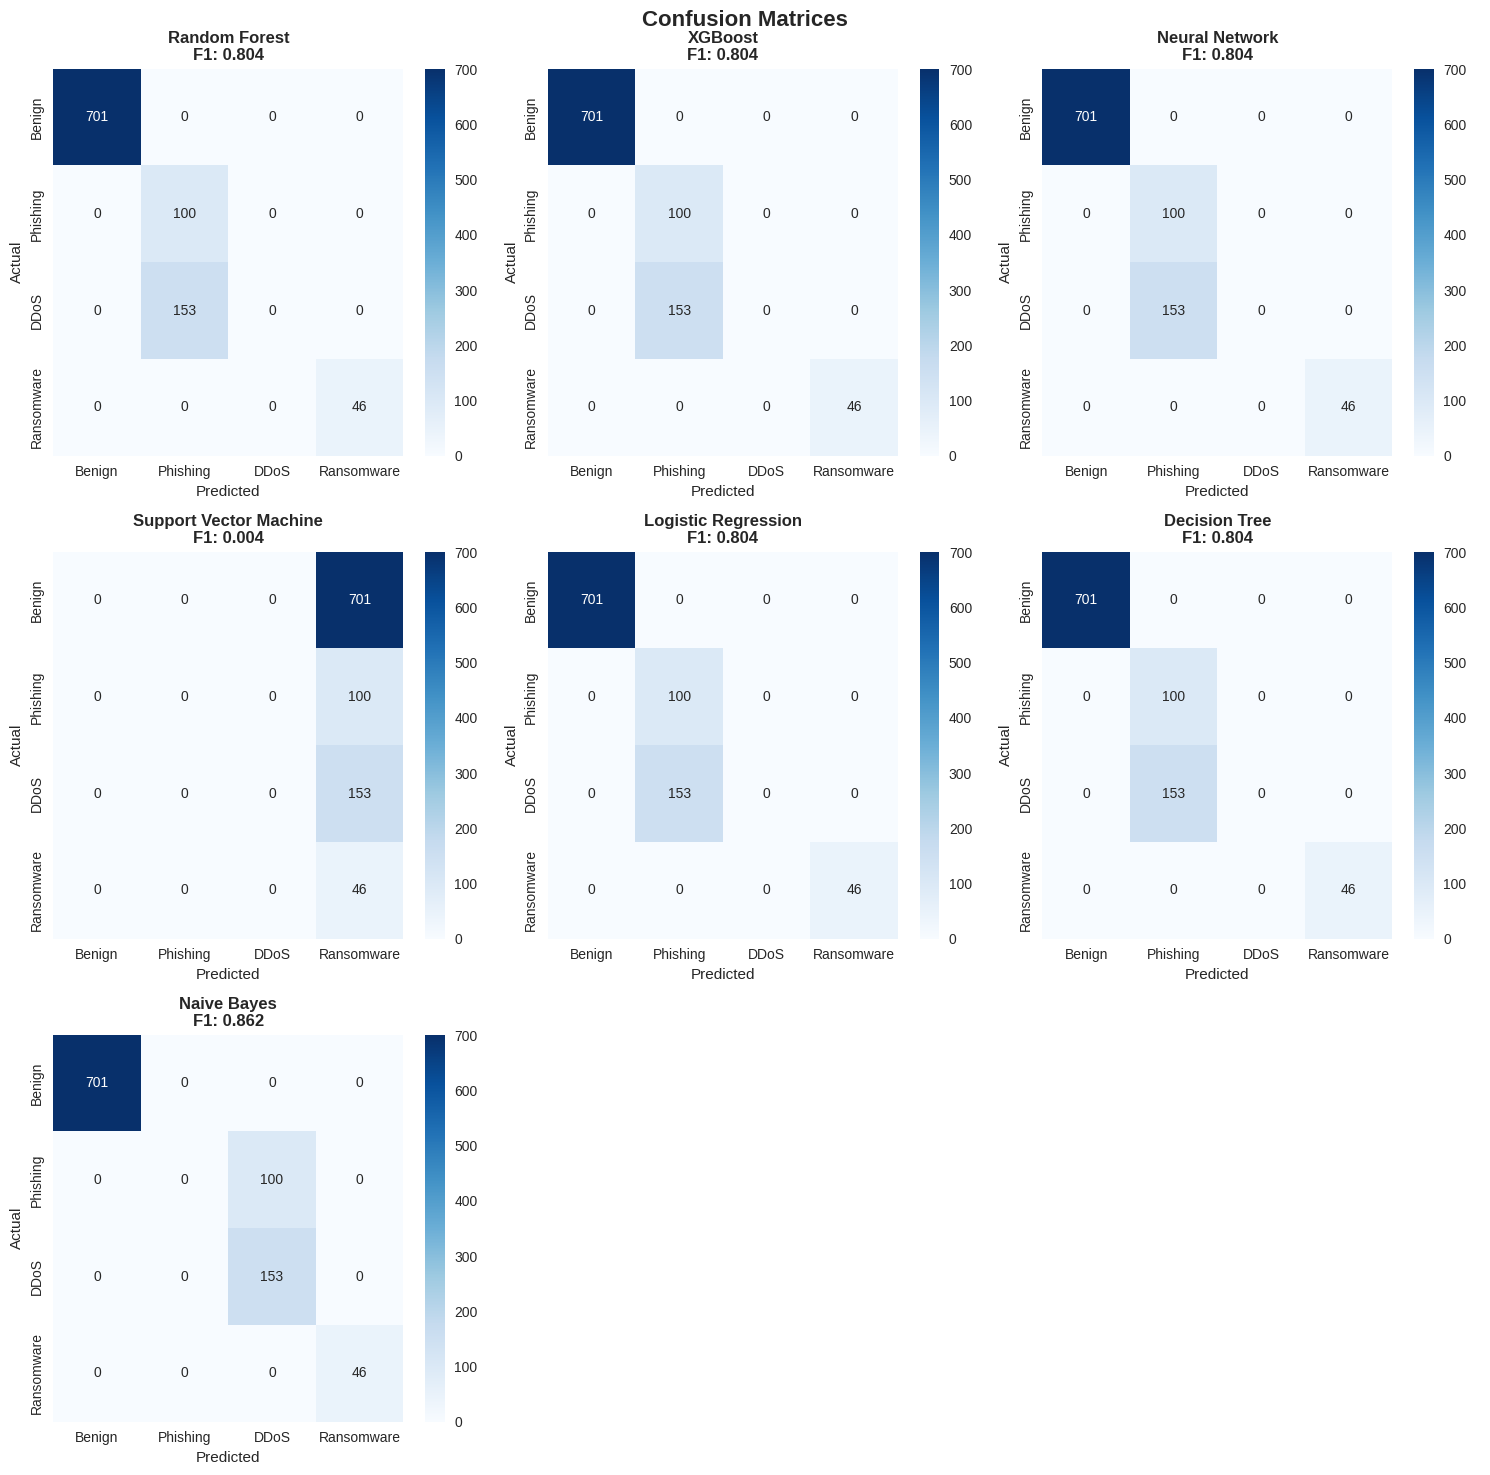

3. Generating feature importance plot...


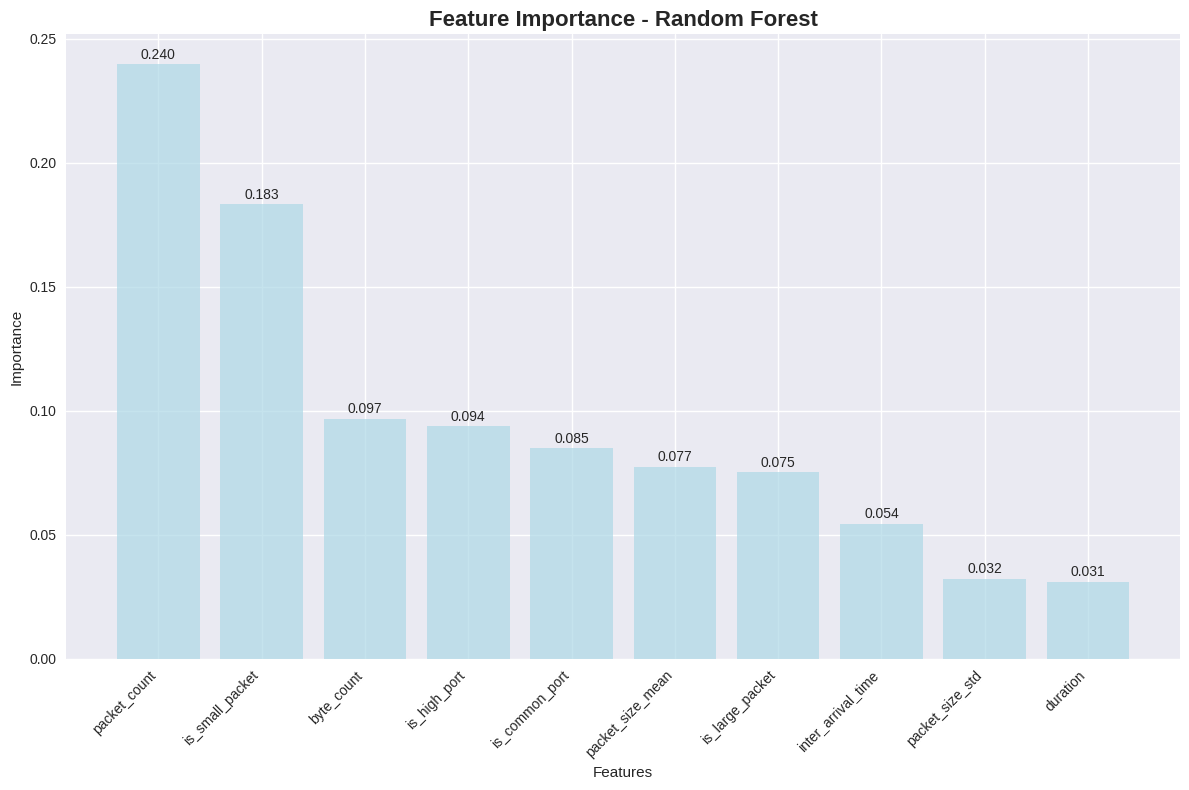

4. Generating training overview...


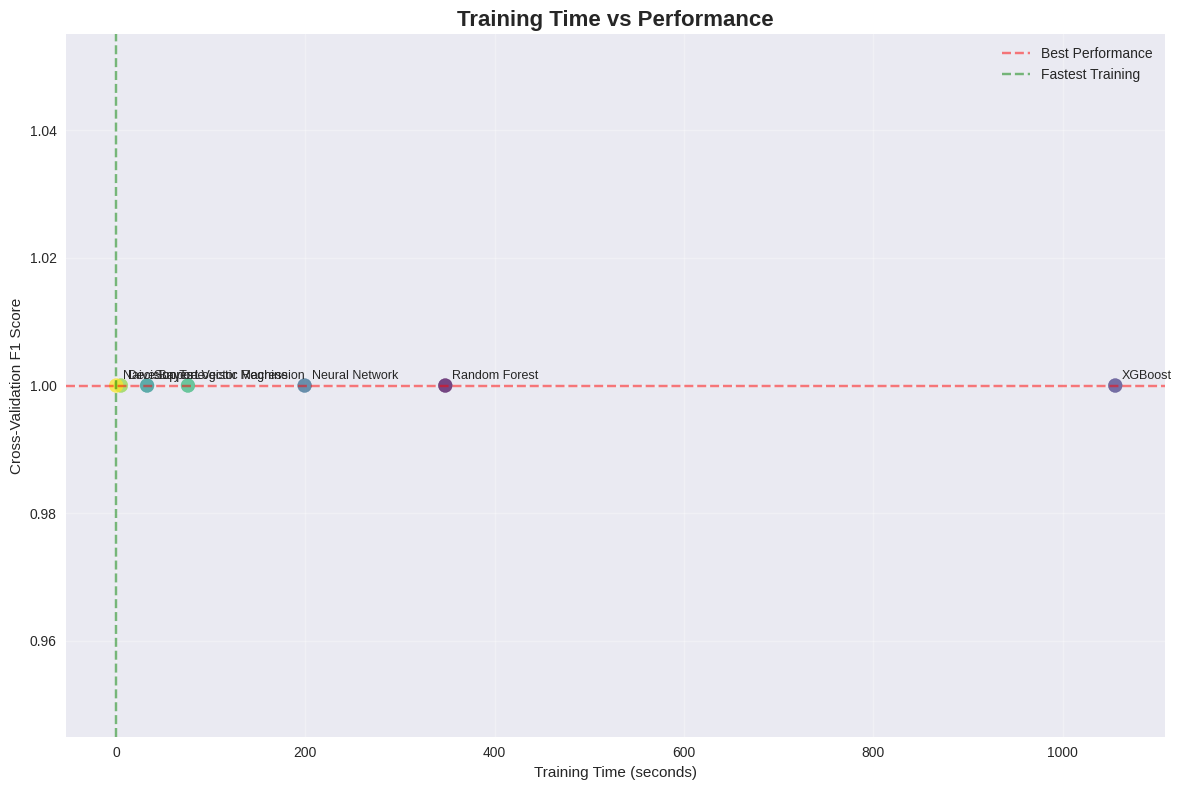


All visualizations saved to ./results/

Model saved successfully to network_intrusion_model.pkl

Training and visualization completed successfully!
Check the './results/' directory for saved visualization files.


In [5]:
import pandas as pd
import numpy as np
import time
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Import models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class NetworkIntrusionDetector:
    def __init__(self, random_state: int = 42):
        self.random_state = random_state
        self.models = {}
        self.scaler = StandardScaler()
        self.attack_categories = {0: 'Benign', 1: 'Phishing', 2: 'DDoS', 3: 'Ransomware'}
        self.feature_names = []
        self.evaluation_results = {}
        self.training_history = {}
        self._initialize_models()

    def _initialize_models(self):
        self.model_configs = {
            'Random Forest': {
                'model': RandomForestClassifier(random_state=self.random_state),
                'params': {
                    'n_estimators': [100, 200, 300],
                    'max_depth': [10, 20, None],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4]
                }
            },
            'XGBoost': {
                'model': GradientBoostingClassifier(random_state=self.random_state),
                'params': {
                    'n_estimators': [100, 200],
                    'learning_rate': [0.01, 0.1, 0.2],
                    'max_depth': [3, 5, 7],
                    'subsample': [0.8, 1.0]
                }
            },
            'Neural Network': {
                'model': MLPClassifier(random_state=self.random_state, max_iter=1000),
                'params': {
                    'hidden_layer_sizes': [(100,), (100, 50), (50, 50, 50)],
                    'activation': ['relu', 'tanh'],
                    'alpha': [0.0001, 0.001, 0.01],
                    'learning_rate': ['constant', 'adaptive']
                }
            },
            'Support Vector Machine': {
                'model': SVC(random_state=self.random_state, probability=True),
                'params': {
                    'C': [0.1, 1, 10],
                    'kernel': ['rbf', 'poly'],
                    'gamma': ['scale', 'auto']
                }
            },
            'Logistic Regression': {
                'model': LogisticRegression(random_state=self.random_state, max_iter=1000),
                'params': {
                    'C': [0.1, 1, 10, 100],
                    'penalty': ['l1', 'l2'],
                    'solver': ['liblinear', 'saga']
                }
            },
            'Decision Tree': {
                'model': DecisionTreeClassifier(random_state=self.random_state),
                'params': {
                    'max_depth': [5, 10, 15, None],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4],
                    'criterion': ['gini', 'entropy']
                }
            },
            'Naive Bayes': {
                'model': GaussianNB(),
                'params': {
                    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
                }
            }
        }

    def prepare_data(self, df, target_column='attack_label', test_size=0.2, handle_imbalance='smote'):
        print("Preparing data for machine learning...")
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        if target_column in numeric_cols:
            numeric_cols.remove(target_column)
        X = df[numeric_cols]
        y = df[target_column]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=self.random_state, stratify=y
        )

        if handle_imbalance == 'smote':
            print("\nApplying SMOTE for class balancing...")
            smote = SMOTE(random_state=self.random_state)
            X_train, y_train = smote.fit_resample(X_train, y_train)

        print("\nScaling features...")
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        self.feature_names = X.columns.tolist()

        return X_train_scaled, X_test_scaled, y_train, y_test

    def train_models(self, X_train, y_train, use_grid_search=True, cv_folds=5, n_jobs=-1):
        print(f"\nTraining {len(self.model_configs)} models...")
        results = {}
        training_times = []
        cv_scores = []
        model_names = []

        for name, config in self.model_configs.items():
            print(f"\nTraining {name}...")
            start_time = time.time()
            model = config['model']

            if use_grid_search and len(config['params']) > 0:
                print(f"  Performing grid search with {cv_folds}-fold CV...")
                cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=self.random_state)
                grid_search = GridSearchCV(model, config['params'], cv=cv, scoring='f1_weighted', n_jobs=n_jobs, verbose=0)
                grid_search.fit(X_train, y_train)
                best_model = grid_search.best_estimator_
                best_params = grid_search.best_params_
                cv_score = grid_search.best_score_
            else:
                print("  Training with default parameters...")
                best_model = model
                best_model.fit(X_train, y_train)
                cv_scores_array = cross_val_score(best_model, X_train, y_train, cv=cv_folds, scoring='f1_weighted')
                cv_score = cv_scores_array.mean()
                best_params = "Default"

            training_time = time.time() - start_time

            results[name] = {
                'model': best_model,
                'cv_score': cv_score,
                'best_params': best_params,
                'training_time': training_time
            }

            # Store data for visualization
            training_times.append(training_time)
            cv_scores.append(cv_score)
            model_names.append(name)

            print(f"  Training completed in {training_time:.2f} seconds")
            print(f"  Cross-validation F1 score: {cv_score:.4f}")

        # Store training history for visualization
        self.training_history = {
            'model_names': model_names,
            'training_times': training_times,
            'cv_scores': cv_scores
        }

        self.models = results
        return results

    def save_model(self, filepath):
        """Save the trained detector to a file"""
        try:
            model_data = {
                'models': self.models,
                'scaler': self.scaler,
                'feature_names': self.feature_names,
                'attack_categories': self.attack_categories,
                'random_state': self.random_state,
                'evaluation_results': self.evaluation_results,
                'training_history': self.training_history
            }
            joblib.dump(model_data, filepath)
            print(f"\nModel saved successfully to {filepath}")
        except Exception as e:
            print(f"Error saving model: {e}")

    def load_model(self, filepath):
        """Load a trained detector from a file"""
        try:
            model_data = joblib.load(filepath)
            self.models = model_data['models']
            self.scaler = model_data['scaler']
            self.feature_names = model_data['feature_names']
            self.attack_categories = model_data['attack_categories']
            self.random_state = model_data['random_state']
            self.evaluation_results = model_data.get('evaluation_results', {})
            self.training_history = model_data.get('training_history', {})
            print(f"\nModel loaded successfully from {filepath}")
        except Exception as e:
            print(f"Error loading model: {e}")

    def predict(self, X, model_name='Random Forest'):
        """Make predictions using a specific model"""
        if model_name not in self.models:
            print(f"Model '{model_name}' not found. Available models: {list(self.models.keys())}")
            return None

        # Scale the input data
        X_scaled = self.scaler.transform(X)

        # Make predictions
        model = self.models[model_name]['model']
        predictions = model.predict(X_scaled)
        probabilities = model.predict_proba(X_scaled)

        return predictions, probabilities

    def get_best_model(self):
        """Get the model with the highest cross-validation score"""
        if not self.models:
            print("No models have been trained yet.")
            return None

        best_model_name = max(self.models.keys(), key=lambda x: self.models[x]['cv_score'])
        best_score = self.models[best_model_name]['cv_score']

        print(f"\nBest model: {best_model_name} (CV F1 Score: {best_score:.4f})")
        return best_model_name, self.models[best_model_name]

    def evaluate_models(self, X_test, y_test):
        """Evaluate all trained models on test data"""
        print("\n" + "="*60)
        print("MODEL EVALUATION RESULTS")
        print("="*60)

        results = {}
        for name, model_info in self.models.items():
            print(f"\n{name}:")
            print("-" * 40)

            # Make predictions
            predictions, probabilities = self.predict(X_test, model_name=name)

            # Calculate metrics
            accuracy = accuracy_score(y_test, predictions)
            f1 = f1_score(y_test, predictions, average='weighted')
            cm = confusion_matrix(y_test, predictions)

            results[name] = {
                'accuracy': accuracy,
                'f1_score': f1,
                'cv_score': model_info['cv_score'],
                'training_time': model_info['training_time'],
                'predictions': predictions,
                'probabilities': probabilities,
                'confusion_matrix': cm
            }

            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"CV Score: {model_info['cv_score']:.4f}")
            print(f"Training Time: {model_info['training_time']:.2f}s")
            print("\nClassification Report:")
            print(classification_report(y_test, predictions,
                                      target_names=[self.attack_categories[i] for i in sorted(self.attack_categories.keys())]))

        self.evaluation_results = results
        return results

    def plot_model_comparison(self, save_path=None):
        """Plot comparison of model performance"""
        if not self.evaluation_results:
            print("No evaluation results available. Please run evaluate_models first.")
            return

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

        models = list(self.evaluation_results.keys())
        accuracies = [self.evaluation_results[m]['accuracy'] for m in models]
        f1_scores = [self.evaluation_results[m]['f1_score'] for m in models]
        cv_scores = [self.evaluation_results[m]['cv_score'] for m in models]
        training_times = [self.evaluation_results[m]['training_time'] for m in models]

        # Accuracy comparison
        axes[0, 0].bar(models, accuracies, color='skyblue', alpha=0.7)
        axes[0, 0].set_title('Model Accuracy', fontweight='bold')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].tick_params(axis='x', rotation=45)
        for i, v in enumerate(accuracies):
            axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

        # F1 Score comparison
        axes[0, 1].bar(models, f1_scores, color='lightgreen', alpha=0.7)
        axes[0, 1].set_title('F1 Score', fontweight='bold')
        axes[0, 1].set_ylabel('F1 Score')
        axes[0, 1].tick_params(axis='x', rotation=45)
        for i, v in enumerate(f1_scores):
            axes[0, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

        # CV Score comparison
        axes[1, 0].bar(models, cv_scores, color='orange', alpha=0.7)
        axes[1, 0].set_title('Cross-Validation Score', fontweight='bold')
        axes[1, 0].set_ylabel('CV F1 Score')
        axes[1, 0].tick_params(axis='x', rotation=45)
        for i, v in enumerate(cv_scores):
            axes[1, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

        # Training Time comparison
        axes[1, 1].bar(models, training_times, color='coral', alpha=0.7)
        axes[1, 1].set_title('Training Time', fontweight='bold')
        axes[1, 1].set_ylabel('Time (seconds)')
        axes[1, 1].tick_params(axis='x', rotation=45)
        for i, v in enumerate(training_times):
            axes[1, 1].text(i, v + 0.1, f'{v:.1f}s', ha='center', va='bottom')

        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

    def plot_confusion_matrices(self, save_path=None):
        """Plot confusion matrices for all models"""
        if not self.evaluation_results:
            print("No evaluation results available. Please run evaluate_models first.")
            return

        n_models = len(self.evaluation_results)
        cols = 3
        rows = (n_models + cols - 1) // cols

        fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
        fig.suptitle('Confusion Matrices', fontsize=16, fontweight='bold')

        if n_models == 1:
            axes = [axes]
        elif rows == 1:
            axes = axes.reshape(1, -1)

        attack_labels = [self.attack_categories[i] for i in sorted(self.attack_categories.keys())]

        for idx, (model_name, results) in enumerate(self.evaluation_results.items()):
            row = idx // cols
            col = idx % cols
            ax = axes[row, col] if rows > 1 else axes[col]

            cm = results['confusion_matrix']
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                       xticklabels=attack_labels, yticklabels=attack_labels)
            ax.set_title(f'{model_name}\nF1: {results["f1_score"]:.3f}', fontweight='bold')
            ax.set_xlabel('Predicted')
            ax.set_ylabel('Actual')

        # Hide empty subplots
        for idx in range(n_models, rows * cols):
            row = idx // cols
            col = idx % cols
            axes[row, col].axis('off')

        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

    def plot_feature_importance(self, model_name='Random Forest', top_n=10, save_path=None):
        """Plot feature importance for tree-based models"""
        if model_name not in self.models:
            print(f"Model '{model_name}' not found.")
            return

        model = self.models[model_name]['model']

        # Check if model has feature importance
        if not hasattr(model, 'feature_importances_'):
            print(f"Model '{model_name}' does not have feature importance.")
            return

        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1][:top_n]

        plt.figure(figsize=(12, 8))
        plt.title(f'Feature Importance - {model_name}', fontsize=16, fontweight='bold')
        plt.bar(range(top_n), importances[indices], color='lightblue', alpha=0.7)
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.xticks(range(top_n), [self.feature_names[i] for i in indices], rotation=45, ha='right')

        # Add value labels on bars
        for i, v in enumerate(importances[indices]):
            plt.text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom')

        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

    def plot_attack_distribution(self, df, save_path=None):
        """Plot the distribution of attack types in the dataset"""
        plt.figure(figsize=(10, 6))

        attack_counts = df['attack_label'].value_counts().sort_index()
        attack_names = [self.attack_categories[i] for i in attack_counts.index]

        bars = plt.bar(attack_names, attack_counts.values, color=['green', 'orange', 'red', 'purple'], alpha=0.7)
        plt.title('Distribution of Attack Types', fontsize=16, fontweight='bold')
        plt.xlabel('Attack Type')
        plt.ylabel('Number of Samples')

        # Add value labels on bars
        for bar, count in zip(bars, attack_counts.values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                    f'{count}\n({count/len(df)*100:.1f}%)', ha='center', va='bottom')

        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

    def plot_training_overview(self, save_path=None):
        """Plot training time vs performance overview"""
        if not self.training_history:
            print("No training history available.")
            return

        plt.figure(figsize=(12, 8))

        models = self.training_history['model_names']
        times = self.training_history['training_times']
        scores = self.training_history['cv_scores']

        # Create scatter plot
        scatter = plt.scatter(times, scores, s=100, alpha=0.7, c=range(len(models)), cmap='viridis')

        # Add model names as labels
        for i, model in enumerate(models):
            plt.annotate(model, (times[i], scores[i]), xytext=(5, 5),
                        textcoords='offset points', fontsize=9)

        plt.title('Training Time vs Performance', fontsize=16, fontweight='bold')
        plt.xlabel('Training Time (seconds)')
        plt.ylabel('Cross-Validation F1 Score')
        plt.grid(True, alpha=0.3)

        # Add ideal region annotation
        plt.axhline(y=max(scores), color='red', linestyle='--', alpha=0.5, label='Best Performance')
        plt.axvline(x=min(times), color='green', linestyle='--', alpha=0.5, label='Fastest Training')
        plt.legend()

        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

    def generate_comprehensive_report(self, save_dir='./results/'):
        """Generate a comprehensive visualization report"""
        import os
        os.makedirs(save_dir, exist_ok=True)

        print("\nGenerating comprehensive visualization report...")

        # Plot all visualizations
        print("1. Generating model comparison plot...")
        self.plot_model_comparison(save_path=f'{save_dir}/model_comparison.png')

        print("2. Generating confusion matrices...")
        self.plot_confusion_matrices(save_path=f'{save_dir}/confusion_matrices.png')

        print("3. Generating feature importance plot...")
        self.plot_feature_importance(save_path=f'{save_dir}/feature_importance.png')

        print("4. Generating training overview...")
        self.plot_training_overview(save_path=f'{save_dir}/training_overview.png')

        print(f"\nAll visualizations saved to {save_dir}")

def create_sample_training_data(n_samples=5000):
    np.random.seed(42)
    data = []

    for i in range(n_samples):
        attack_type = np.random.choice([0, 1, 2, 3], p=[0.7, 0.1, 0.15, 0.05])
        if attack_type == 0:  # Benign
            features = {
                'packet_count': np.random.poisson(50),
                'byte_count': np.random.normal(1200, 300),
                'duration': np.random.exponential(10),
                'src_port': np.random.randint(1024, 65535),
                'dst_port': np.random.choice([80, 443, 22, 21], p=[0.4, 0.3, 0.2, 0.1]),
                'protocol': np.random.choice([6, 17], p=[0.8, 0.2]),
                'packet_size_mean': np.random.normal(800, 100),
                'packet_size_std': np.random.gamma(2, 50),
                'inter_arrival_time': np.random.exponential(0.1),
                'is_common_port': 1,
                'is_high_port': 0,
                'is_tcp': 1,
                'is_udp': 0,
                'is_large_packet': 0,
                'is_small_packet': 0
            }
        elif attack_type == 1:  # Phishing
            features = {
                'packet_count': np.random.poisson(30),
                'byte_count': np.random.normal(800, 200),
                'duration': np.random.exponential(5),
                'src_port': np.random.randint(1024, 65535),
                'dst_port': np.random.choice([80, 443, 25], p=[0.5, 0.3, 0.2]),
                'protocol': 6,
                'packet_size_mean': np.random.normal(600, 150),
                'packet_size_std': np.random.gamma(1.5, 30),
                'inter_arrival_time': np.random.exponential(0.2),
                'is_common_port': 1,
                'is_high_port': 0,
                'is_tcp': 1,
                'is_udp': 0,
                'is_large_packet': 0,
                'is_small_packet': 1
            }
        elif attack_type == 2:  # DDoS
            features = {
                'packet_count': np.random.poisson(200),
                'byte_count': np.random.normal(500, 100),
                'duration': np.random.exponential(1),
                'src_port': np.random.randint(1024, 65535),
                'dst_port': np.random.choice([80, 443, 53], p=[0.5, 0.3, 0.2]),
                'protocol': np.random.choice([6, 17], p=[0.6, 0.4]),
                'packet_size_mean': np.random.normal(400, 80),
                'packet_size_std': np.random.gamma(1, 20),
                'inter_arrival_time': np.random.exponential(0.01),
                'is_common_port': 1,
                'is_high_port': 0,
                'is_tcp': 1,
                'is_udp': 0,
                'is_large_packet': 0,
                'is_small_packet': 1
            }
        else:  # Ransomware
            features = {
                'packet_count': np.random.poisson(80),
                'byte_count': np.random.normal(2000, 500),
                'duration': np.random.exponential(30),
                'src_port': np.random.randint(1024, 65535),
                'dst_port': np.random.choice([443, 8080, 9999], p=[0.4, 0.3, 0.3]),
                'protocol': 6,
                'packet_size_mean': np.random.normal(1200, 200),
                'packet_size_std': np.random.gamma(3, 100),
                'inter_arrival_time': np.random.exponential(0.5),
                'is_common_port': 0,
                'is_high_port': 1,
                'is_tcp': 1,
                'is_udp': 0,
                'is_large_packet': 1,
                'is_small_packet': 0
            }

        features['attack_label'] = attack_type
        data.append(features)

    return pd.DataFrame(data)

def main():
    print("Network Intrusion Detection - Training Phase with Visualizations")
    print("="*60)

    # Create sample data
    df = create_sample_training_data(n_samples=5000)
    print(f"Generated {len(df)} samples")
    print(f"Attack distribution: {df['attack_label'].value_counts().sort_index()}")

    # Initialize detector
    detector = NetworkIntrusionDetector()

    # Plot attack distribution
    print("\nPlotting attack distribution...")
    detector.plot_attack_distribution(df)

    # Prepare data
    X_train, X_test, y_train, y_test = detector.prepare_data(
        df, target_column='attack_label', handle_imbalance='smote'
    )

    # Train models
    detector.train_models(X_train, y_train, use_grid_search=True, cv_folds=3)

    # Evaluate models
    detector.evaluate_models(X_test, y_test)

    # Generate all visualizations
    print("\nGenerating visualizations...")
    detector.plot_model_comparison()
    detector.plot_confusion_matrices()
    detector.plot_feature_importance()
    detector.plot_training_overview()

    # Get best model
    detector.get_best_model()

    # Generate comprehensive report
    detector.generate_comprehensive_report()

    # Save the model
    detector.save_model("network_intrusion_model.pkl")

    print("\n" + "="*60)
    print("Training and visualization completed successfully!")
    print("Check the './results/' directory for saved visualization files.")

if __name__ == "__main__":
    main()